In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, classification_report, accuracy_score

In [ ]:
#Load data
df = pd.read_csv('/Users/zhangzixian/Desktop/flights_sample_3m.csv')

df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

Analysis of Flight Delays

Percentage of flights with departure delays: 33.97%
Average Departure Delay: 10.12 minutes
Range of Departure Delays: -90.0 minutes to 2966.0 minutes


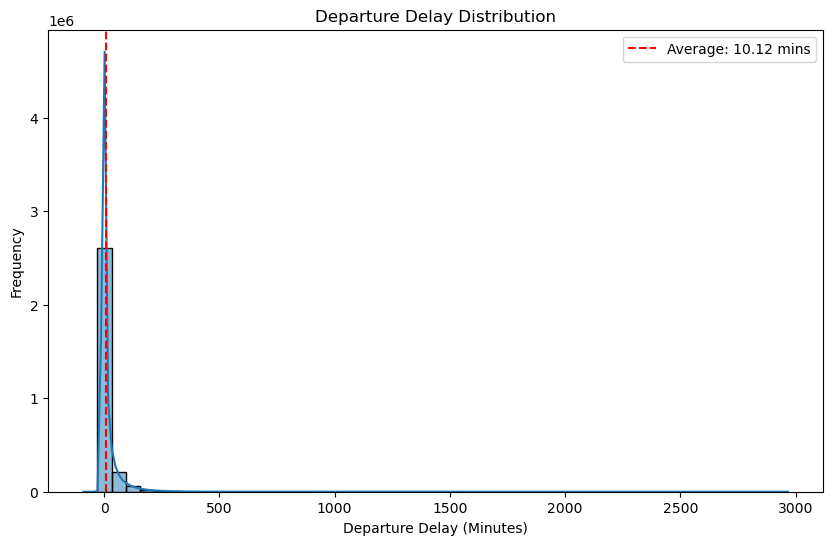

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate the percentage of flights with departure delays
total_flights = len(df['DEP_DELAY'].dropna())  # Exclude NaN values
delayed_flights = len(df[df['DEP_DELAY'] > 0])
percentage_delayed = (delayed_flights / total_flights) * 100

# Step 2: Calculate the average departure delay and the range of delay
average_dep_delay = df['DEP_DELAY'].mean()  # Mean of departure delays
min_dep_delay = df['DEP_DELAY'].min()       # Minimum departure delay
max_dep_delay = df['DEP_DELAY'].max()       # Maximum departure delay

# Step 3: Print statistics
print(f"Percentage of flights with departure delays: {percentage_delayed:.2f}%")
print(f"Average Departure Delay: {average_dep_delay:.2f} minutes")
print(f"Range of Departure Delays: {min_dep_delay} minutes to {max_dep_delay} minutes")

# Step 4: Visualize the departure delay distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['DEP_DELAY'].dropna(), bins=50, kde=True)
plt.title('Departure Delay Distribution')
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Frequency')

# Add a red line to show the average departure delay
plt.axvline(average_dep_delay, color='red', linestyle='--', label=f'Average: {average_dep_delay:.2f} mins')

# Add a legend for the average line
plt.legend()

# Display the plot
plt.show()

Percentage of flights with arrival delays: 33.57%
Average Arrival Delay: 4.26 minutes
Range of Arrival Delays: -96.0 minutes to 2934.0 minutes


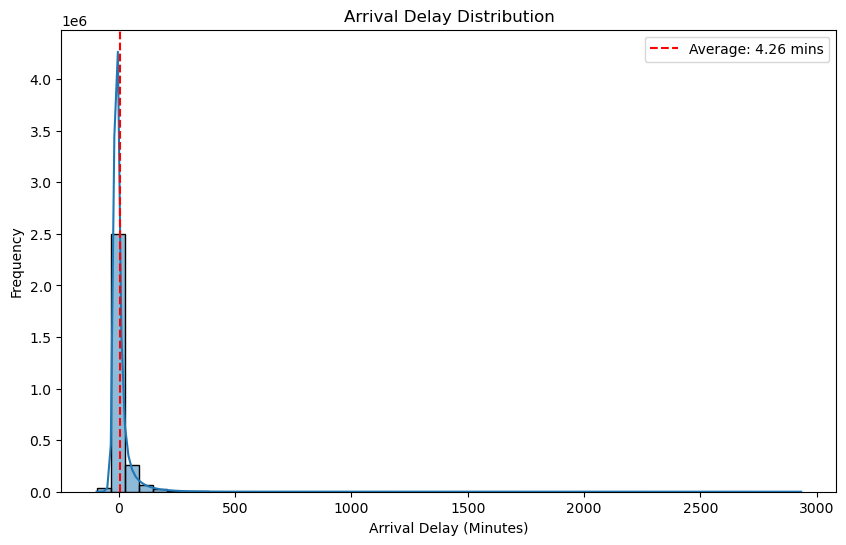

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate the percentage of flights with arrival delays
total_flights = len(df['ARR_DELAY'].dropna())  # Exclude NaN values
delayed_flights = len(df[df['ARR_DELAY'] > 0])
percentage_delayed = (delayed_flights / total_flights) * 100

# Step 2: Calculate the average arrival delay and the range of delay
average_arr_delay = df['ARR_DELAY'].mean()  # Mean of arrival delays
min_arr_delay = df['ARR_DELAY'].min()       # Minimum arrival delay
max_arr_delay = df['ARR_DELAY'].max()       # Maximum arrival delay

# Step 3: Print statistics
print(f"Percentage of flights with arrival delays: {percentage_delayed:.2f}%")
print(f"Average Arrival Delay: {average_arr_delay:.2f} minutes")
print(f"Range of Arrival Delays: {min_arr_delay} minutes to {max_arr_delay} minutes")

# Step 4: Visualize the arrival delay distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['ARR_DELAY'].dropna(), bins=50, kde=True)
plt.title('Arrival Delay Distribution')
plt.xlabel('Arrival Delay (Minutes)')
plt.ylabel('Frequency')

# Add a red line to show the average arrival delay
plt.axvline(average_arr_delay, color='red', linestyle='--', label=f'Average: {average_arr_delay:.2f} mins')

# Add a legend for the average line
plt.legend()

# Display the plot
plt.show()


Linear regression (causes of delay)

In [ ]:
# Linear regression (causes of delay)
df.fillna(0, inplace=True)

X = df[['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']]

# Dependent variable (flight departure delay in minutes)
y = df['DEP_DELAY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant for statsmodels (to calculate intercept)
X_train_const = sm.add_constant(X_train)

# Fit the model using statsmodels to easily access coefficients and p-values
model = sm.OLS(y_train, X_train_const).fit()

# Summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              DEP_DELAY   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 8.162e+06
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:55:45   Log-Likelihood:            -9.2543e+06
No. Observations:             2400000   AIC:                         1.851e+07
Df Residuals:                 2399994   BIC:                         1.851e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Time Series Analysis for Delay Trend

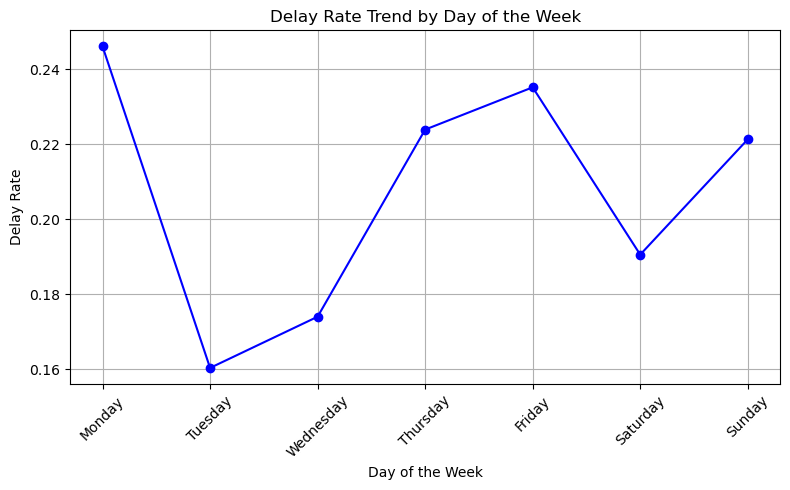

In [ ]:
# Daily Average Delay
# Load the dataset
df = pd.read_csv('/Users/zhangzixian/Desktop/flights_sample_3m.csv')

#  Convert flight date to datetime format
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

# 1 for delayed, 0 for not delayed (arrival delay > 10 minutes)
df['Delayed'] = np.where(df['ARR_DELAY'] > 10, 1, 0)

#  Extract the day of the week from the flight date (0 = Monday, 6 = Sunday)
df['DayOfWeek'] = df['FL_DATE'].dt.dayofweek

# Step 5: Group by day of the week and calculate the delay rate
day_of_week_delay_rate = df.groupby('DayOfWeek')['Delayed'].mean().reset_index()

# Rename the columns for clarity
day_of_week_delay_rate = day_of_week_delay_rate.rename(columns={'Delayed': 'Delay_Rate'})

# Step 6: Map numeric day of the week to actual day names for better visualization
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
day_of_week_delay_rate['DayOfWeek'] = day_of_week_delay_rate['DayOfWeek'].map(day_names)

# Step 7: Visualize the delay rate by day of the week
days = [day_mapping[day] for day in sorted(day_of_week_delay_rate_sorted.keys())]
delay_rates = [day_of_week_delay_rate_sorted[day] for day in sorted(day_of_week_delay_rate_sorted.keys())]

# Create a line plot to show the trend from Monday to Sunday
plt.figure(figsize=(8, 5))
plt.plot(days, delay_rates, marker='o', linestyle='-', color='blue')
plt.title('Delay Rate Trend by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delay Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


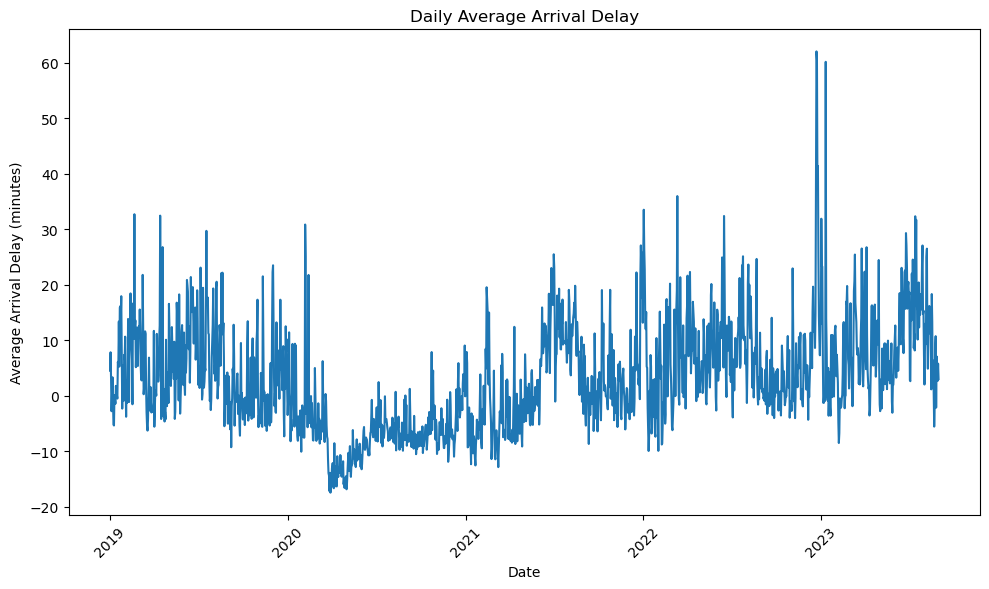

In [ ]:
# Convert the flight date to datetime
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

# Aggregate by day to calculate average delay per day
daily_delay = df.groupby('FL_DATE')['ARR_DELAY'].mean().reset_index()

# Resample to weekly average delays
weekly_delay = daily_delay.set_index('FL_DATE').resample('W').mean()

# Resample to monthly average delays
monthly_delay = daily_delay.set_index('FL_DATE').resample('M').mean()

import matplotlib.pyplot as plt

# Plot daily average delays
plt.figure(figsize=(10, 6))
plt.plot(daily_delay['FL_DATE'], daily_delay['ARR_DELAY'], label='Daily Average Delay')
plt.title('Daily Average Arrival Delay')
plt.xlabel('Date')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Monthly Delay Rate (Percentage of flights delayed):
Month
January      19.273396
February     20.817153
March        18.933534
April        19.302764
May          19.812300
June         25.883448
July         24.965610
August       22.329539
September    15.612194
October      18.111537
November     17.345691
December     23.621912
Name: Delayed, dtype: float64


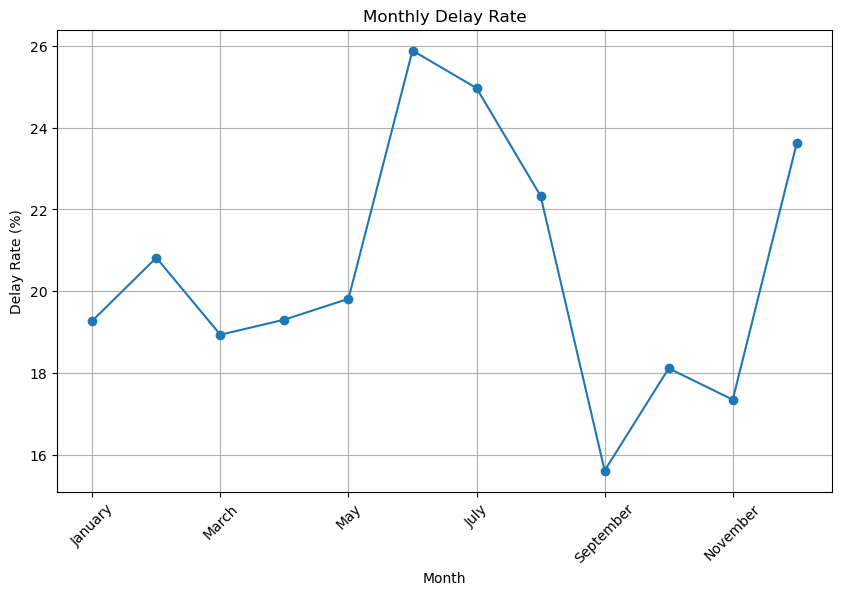

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import calendar

# 1 for delayed, 0 for not delayed (arrival delay > 10 minutes)
df['Delayed'] = np.where(df['ARR_DELAY'] > 10, 1, 0)

# Convert flight date to datetime and extract the month
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['Month'] = df['FL_DATE'].dt.month

# Calculate the monthly delay rate (proportion of delayed flights), multiply by 100 to get percentage
monthly_delay_rate = df.groupby('Month')['Delayed'].mean() * 100

# Map month numbers to month names
monthly_delay_rate.index = monthly_delay_rate.index.map(lambda x: calendar.month_name[x])

# Print the monthly delay rate values
print("Monthly Delay Rate (Percentage of flights delayed):")
print(monthly_delay_rate)

# Draw the monthly delay rate as a line chart with month names
plt.figure(figsize=(10, 6))
monthly_delay_rate.plot(kind='line', marker='o')
plt.title('Monthly Delay Rate')
plt.xlabel('Month')
plt.ylabel('Delay Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

<Figure size 1200x800 with 0 Axes>

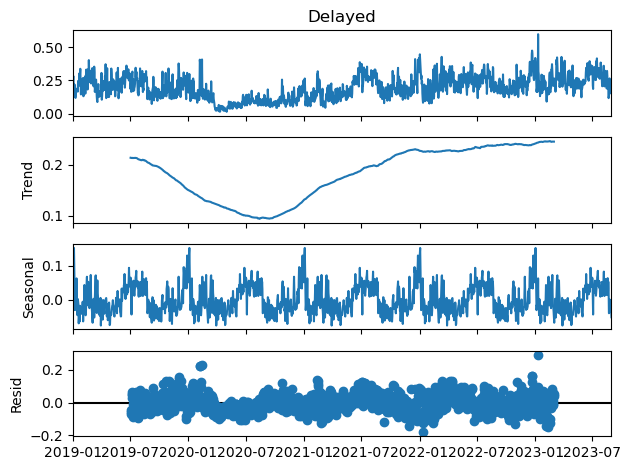

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Calulate daily delay rate
daily_delay_rate = df.groupby('FL_DATE')['Delayed'].mean()

# Seasonal decompose
result = seasonal_decompose(daily_delay_rate, model='additive', period=365)

plt.figure(figsize=(12, 8))
result.plot()
plt.show()


Forecast for the next 12 months:
2023-09-30    0.190428
2023-10-31    0.216330
2023-11-30    0.219565
2023-12-31    0.213025
2024-01-31    0.219732
2024-02-29    0.222758
2024-03-31    0.216540
2024-04-30    0.213935
2024-05-31    0.216693
2024-06-30    0.217442
2024-07-31    0.216728
2024-08-31    0.217142
Freq: M, Name: predicted_mean, dtype: float64


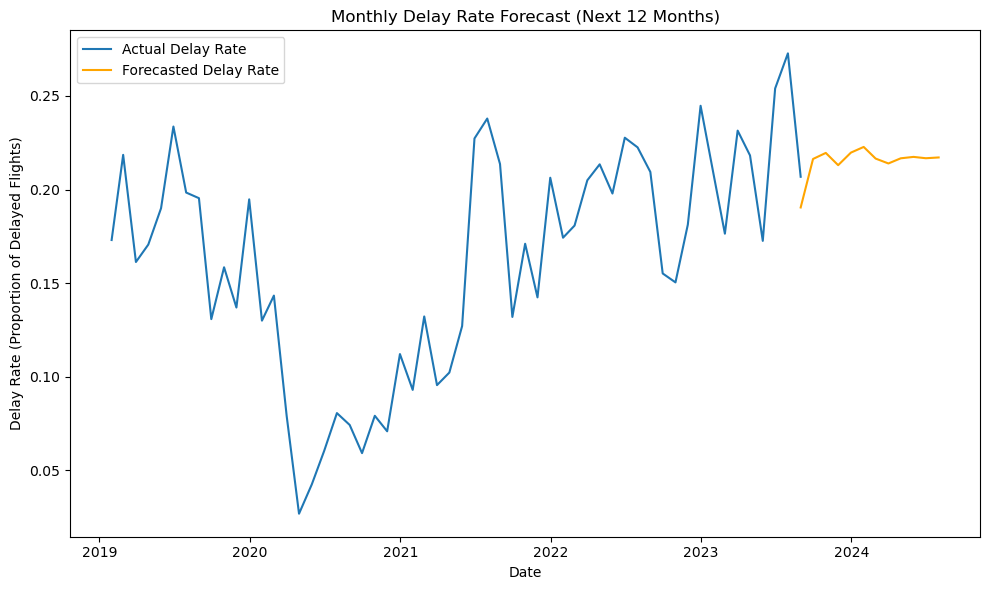

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Convert the flight date to datetime
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

# Step 1: Create a 'is_delayed' column to mark if a flight was delayed (e.g., ARR_DELAY > 15 minutes)
df['is_delayed'] = (df['ARR_DELAY'] > 15).astype(int)

# Step 2: Resample the data to monthly delay rates (proportion of delayed flights per month)
monthly_delay_rate = df.resample('M', on='FL_DATE')['is_delayed'].mean()

# Step 3: Fit the ARIMA model to the monthly delay rate
model = ARIMA(monthly_delay_rate, order=(5, 1, 0))
model_fit = model.fit()

# Step 4: Forecast the delay rate for the next 12 months
forecast = model_fit.forecast(steps=12)  # Forecast for 12 months
print("Forecast for the next 12 months:")
print(forecast)

# Step 5: Plot the actual vs forecasted delay rates
plt.figure(figsize=(10, 6))
plt.plot(monthly_delay_rate.index, monthly_delay_rate, label='Actual Delay Rate')
plt.plot(pd.date_range(monthly_delay_rate.index[-1], periods=12, freq='M'), forecast, label='Forecasted Delay Rate', color='orange')
plt.title('Monthly Delay Rate Forecast (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Delay Rate (Proportion of Delayed Flights)')
plt.legend()
plt.tight_layout()
plt.show()


Mean Absolute Error (MAE): 0.0308
Root Mean Squared Error (RMSE): 0.0424
Mean Absolute Percentage Error (MAPE): 25.25%


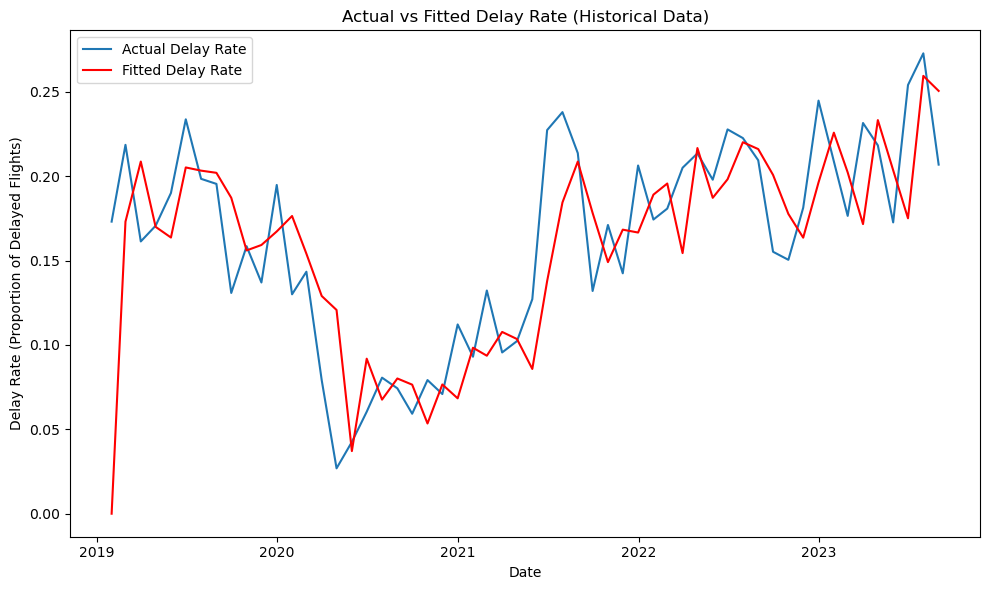

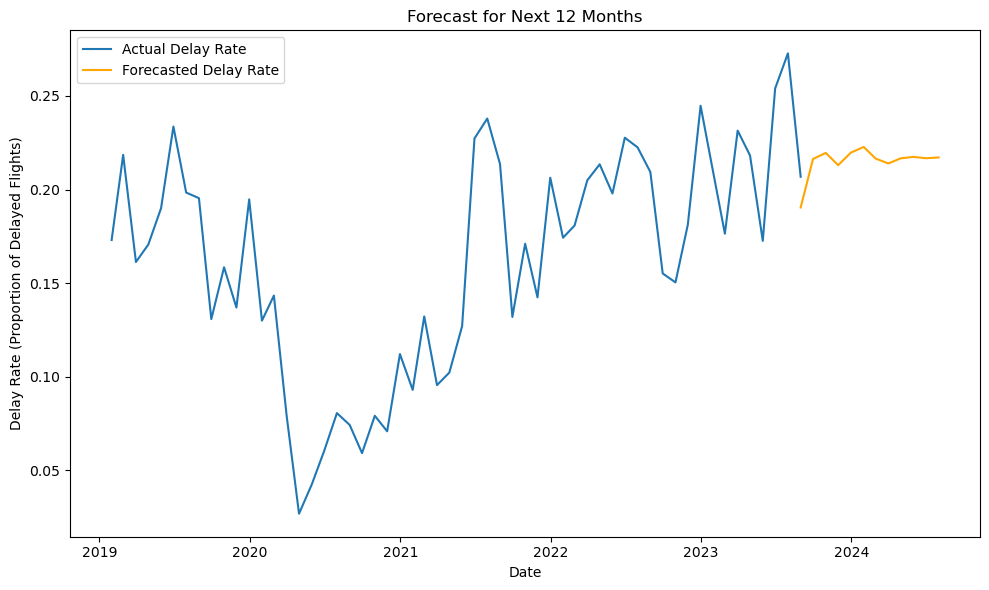

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Forecast for the next 12 months (this should already be part of your existing code)
forecast = model_fit.forecast(steps=12)

# Create a fitted values series for the historical data to evaluate in-sample performance
fitted_values = model_fit.fittedvalues

# Compute error metrics for the historical data
mae = mean_absolute_error(monthly_delay_rate, fitted_values)
rmse = np.sqrt(mean_squared_error(monthly_delay_rate, fitted_values))

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate and print Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((monthly_delay_rate - fitted_values) / monthly_delay_rate)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Visualize the actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(monthly_delay_rate.index, monthly_delay_rate, label='Actual Delay Rate')
plt.plot(monthly_delay_rate.index, fitted_values, label='Fitted Delay Rate', color='red')
plt.title('Actual vs Fitted Delay Rate (Historical Data)')
plt.xlabel('Date')
plt.ylabel('Delay Rate (Proportion of Delayed Flights)')
plt.legend()
plt.tight_layout()
plt.show()

# Forecasted values for next 12 months
plt.figure(figsize=(10, 6))
plt.plot(monthly_delay_rate.index, monthly_delay_rate, label='Actual Delay Rate')
plt.plot(pd.date_range(monthly_delay_rate.index[-1], periods=12, freq='M'), forecast, label='Forecasted Delay Rate', color='orange')
plt.title('Forecast for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Delay Rate (Proportion of Delayed Flights)')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools

# Define the p, d, q parameter range for grid search
p = range(0, 6)  # Adjust as needed
d = range(0, 2)  # Typically 0 or 1, sometimes 2
q = range(0, 3)  # Adjust as needed
pdq = list(itertools.product(p, d, q))

# Track the best parameters
best_aic = float('inf')
best_order = None
best_model = None

warnings.filterwarnings("ignore")  # Ignore convergence warnings

for param in pdq:
    try:
        # Fit the ARIMA model
        model = ARIMA(monthly_delay_rate, order=param)
        model_fit = model.fit()

        # Calculate AIC (Akaike Information Criterion)
        aic = model_fit.aic
        print(f"ARIMA{param} - AIC: {aic}")

        if aic < best_aic:
            best_aic = aic
            best_order = param
            best_model = model_fit
    except:
        continue

print(f"\nBest ARIMA model: ARIMA{best_order} - AIC: {best_aic}")


ARIMA(0, 0, 0) - AIC: -153.7401157605437
ARIMA(0, 0, 1) - AIC: -178.14903569083083
ARIMA(0, 0, 2) - AIC: -194.69012582113706
ARIMA(0, 1, 0) - AIC: -194.72541227777816
ARIMA(0, 1, 1) - AIC: -197.20648030825117
ARIMA(0, 1, 2) - AIC: -196.6119503534454
ARIMA(1, 0, 0) - AIC: -201.02032307597673
ARIMA(1, 0, 1) - AIC: -199.95231823889878
ARIMA(1, 0, 2) - AIC: -198.39196244258437
ARIMA(1, 1, 0) - AIC: -195.75041469579045
ARIMA(1, 1, 1) - AIC: -196.9639647773757
ARIMA(1, 1, 2) - AIC: -195.00169649711663
ARIMA(2, 0, 0) - AIC: -199.8192296592249
ARIMA(2, 0, 1) - AIC: -198.64137635950607
ARIMA(2, 0, 2) - AIC: -202.54207822751692
ARIMA(2, 1, 0) - AIC: -194.2871011422374
ARIMA(2, 1, 1) - AIC: -195.0581486557806
ARIMA(2, 1, 2) - AIC: -198.42859867021386
ARIMA(3, 0, 0) - AIC: -197.82759752530535
ARIMA(3, 0, 1) - AIC: -202.21398633799913
ARIMA(3, 0, 2) - AIC: -200.46229776271053
ARIMA(3, 1, 0) - AIC: -199.08713255713863
ARIMA(3, 1, 1) - AIC: -200.60621640068368
ARIMA(3, 1, 2) - AIC: -200.2571068084107

Improved Model - Mean Absolute Error (MAE): 0.0279
Improved Model - Root Mean Squared Error (RMSE): 0.0344
Improved Model - Mean Absolute Percentage Error (MAPE): 24.27%


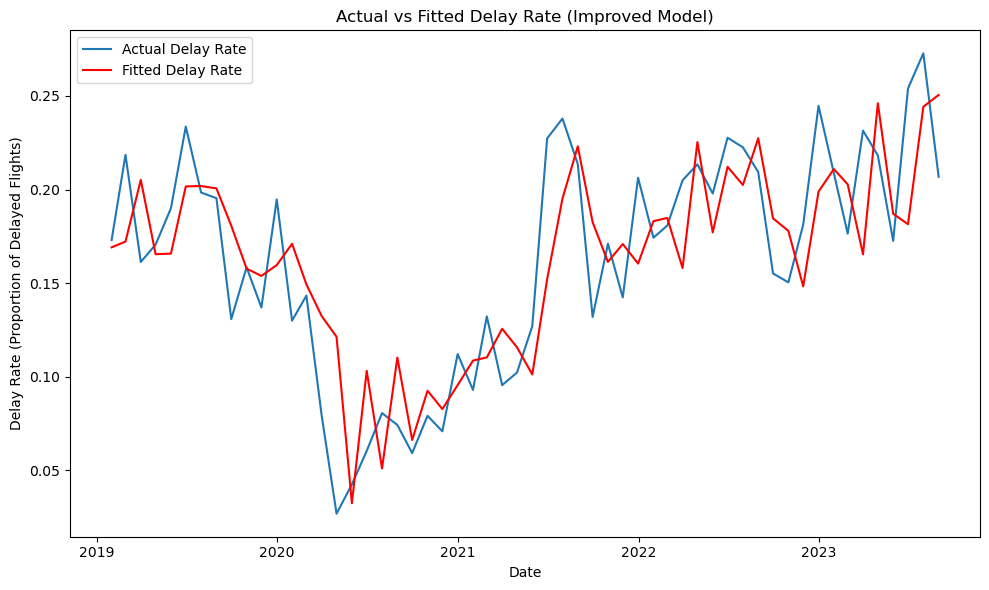

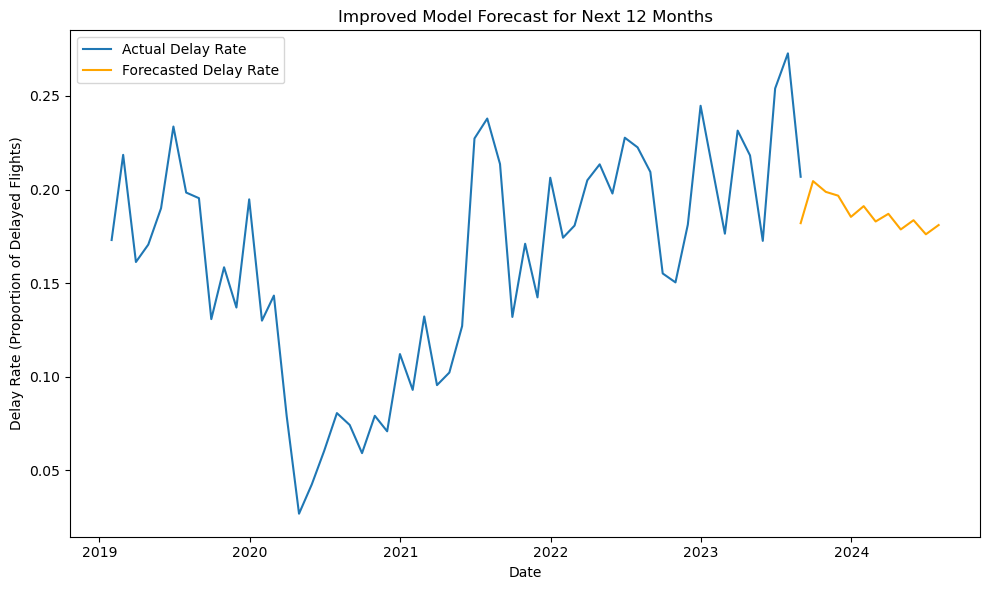

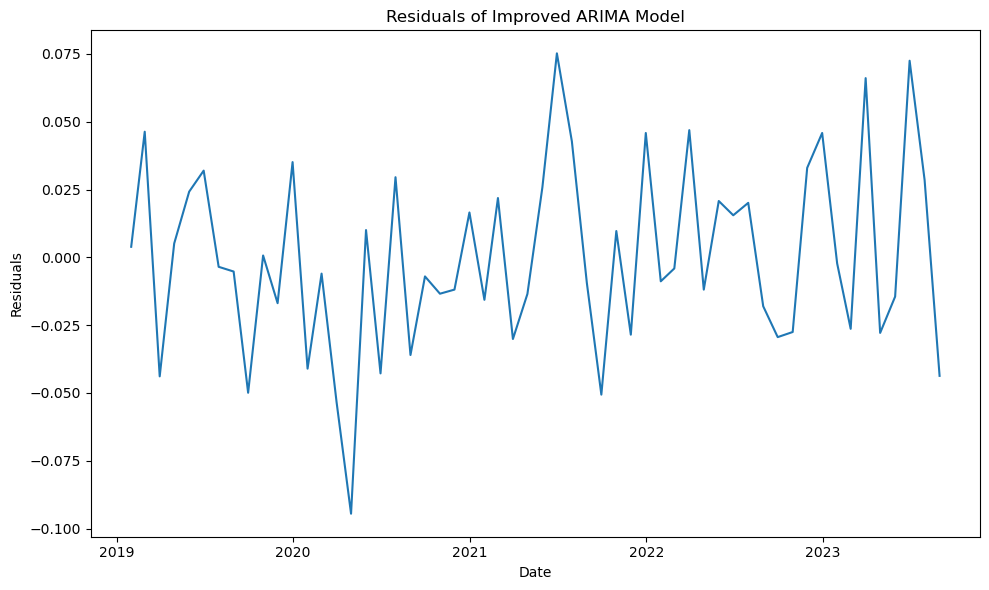

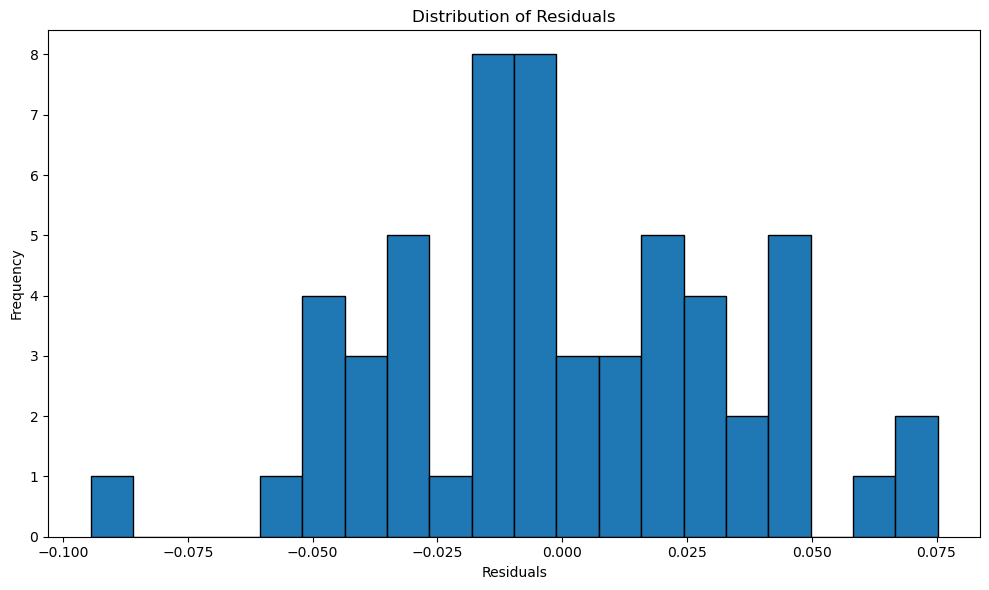

In [ ]:
#import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Fit the improved ARIMA model using the best parameters (replace with the best p, d, q)
best_p, best_d, best_q = 4, 0, 1  # Replace with your optimized values after grid search or ACF/PACF analysis

# Fit the ARIMA model with the best parameters
improved_model = ARIMA(monthly_delay_rate, order=(best_p, best_d, best_q))
improved_model_fit = improved_model.fit()

# Step 2: Evaluate the improved model on historical data (fitted values)
fitted_values = improved_model_fit.fittedvalues

# Compute error metrics
mae = mean_absolute_error(monthly_delay_rate, fitted_values)
rmse = np.sqrt(mean_squared_error(monthly_delay_rate, fitted_values))
mape = np.mean(np.abs((monthly_delay_rate - fitted_values) / monthly_delay_rate)) * 100

# Print the error metrics
print(f"Improved Model - Mean Absolute Error (MAE): {mae:.4f}")
print(f"Improved Model - Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Improved Model - Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Step 3: Plot the actual vs fitted values
plt.figure(figsize=(10, 6))
plt.plot(monthly_delay_rate.index, monthly_delay_rate, label='Actual Delay Rate')
plt.plot(monthly_delay_rate.index, fitted_values, label='Fitted Delay Rate', color='red')
plt.title('Actual vs Fitted Delay Rate (Improved Model)')
plt.xlabel('Date')
plt.ylabel('Delay Rate (Proportion of Delayed Flights)')
plt.legend()
plt.tight_layout()
plt.show()

# Step 4: Forecast for the next 12 months
forecast = improved_model_fit.forecast(steps=12)

# Step 5: Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(monthly_delay_rate.index, monthly_delay_rate, label='Actual Delay Rate')
plt.plot(pd.date_range(monthly_delay_rate.index[-1], periods=12, freq='M'), forecast, label='Forecasted Delay Rate', color='orange')
plt.title('Improved Model Forecast for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Delay Rate (Proportion of Delayed Flights)')
plt.legend()
plt.tight_layout()
plt.show()

# Step 6: Residual Diagnostics
residuals = improved_model_fit.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of Improved ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# Plot residuals' distribution
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='k')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



Logistic Regression Model for Flight Delay Prediction

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv('/Users/zhangzixian/Desktop/flights_sample_3m.csv')

# Convert 'FL_DATE' to datetime and extract date features
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['Month'] = df['FL_DATE'].dt.month
df['DayofWeek'] = df['FL_DATE'].dt.dayofweek

# Convert 'Month' and 'DayofWeek' to categorical
df['Month'] = df['Month'].astype('category')
df['DayofWeek'] = df['DayofWeek'].astype('category')

# Apply Label Encoding to the 'AIRLINE' and 'ORIGIN' columns
le_airline = LabelEncoder()
df['Airline_encoded'] = le_airline.fit_transform(df['AIRLINE'])

le_airport = LabelEncoder()
df['Origin_encoded'] = le_airport.fit_transform(df['ORIGIN'])

le_airport = LabelEncoder()
df['Dest_encoded'] = le_airport.fit_transform(df['DEST'])

# Define features including 'Month', 'DayofWeek', 'Airline', and 'Origin'
categorical_features = ['Airline_encoded', 'Origin_encoded','Dest_encoded']
continuous_features = ['CRS_DEP_TIME', 'CRS_ARR_TIME', 'DISTANCE']
date_features = ['Month', 'DayofWeek']

# Combine all categorical, continuous, and date features into a single DataFrame
X = pd.concat([df[categorical_features + continuous_features], pd.get_dummies(df[date_features], drop_first=True)], axis=1)

# Create a binary target variable (ARR_DELAY > 10 minutes is considered a delay)
y = (df['ARR_DELAY'] > 10).astype(int)  # 1 for delayed, 0 for not delayed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict the probabilities for class 1 (delay)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # Probability of being delayed

# Predict binary outcomes (0 or 1)
y_pred = logreg.predict(X_test)


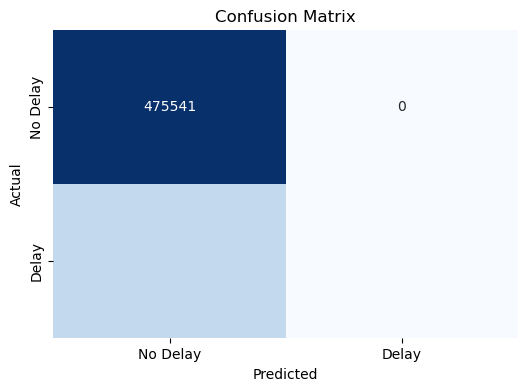

In [ ]:
# Confusion Matrix
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Delay', 'Delay'], yticklabels=['No Delay', 'Delay'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88    475541
           1       1.00      0.00      0.00    124459

    accuracy                           0.79    600000
   macro avg       0.90      0.50      0.44    600000
weighted avg       0.84      0.79      0.70    600000

ROC AUC Score: 0.61


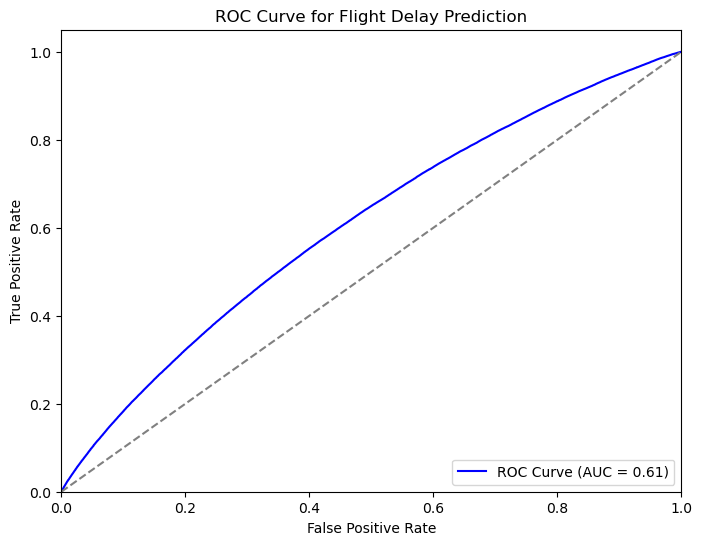

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f'ROC AUC Score: {roc_auc:.2f}')

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Flight Delay Prediction')
plt.legend(loc='lower right')
plt.show()

Airline Delay Performance

AIRLINE
Alaska Airlines Inc.                   4.640018
Horizon Air                            4.832775
Hawaiian Airlines Inc.                 5.089537
Republic Airline                       5.804359
Endeavor Air Inc.                      5.951135
Envoy Air                              6.728256
PSA Airlines Inc.                      7.972124
Delta Air Lines Inc.                   8.106748
SkyWest Airlines Inc.                  9.458294
Southwest Airlines Co.                10.816957
United Air Lines Inc.                 11.217032
Mesa Airlines Inc.                    12.277383
American Airlines Inc.                12.609895
ExpressJet Airlines LLC d/b/a aha!    12.774462
Spirit Air Lines                      12.981880
Allegiant Air                         13.907797
Frontier Airlines Inc.                16.033574
JetBlue Airways                       18.322555
Name: DEP_DELAY, dtype: float64


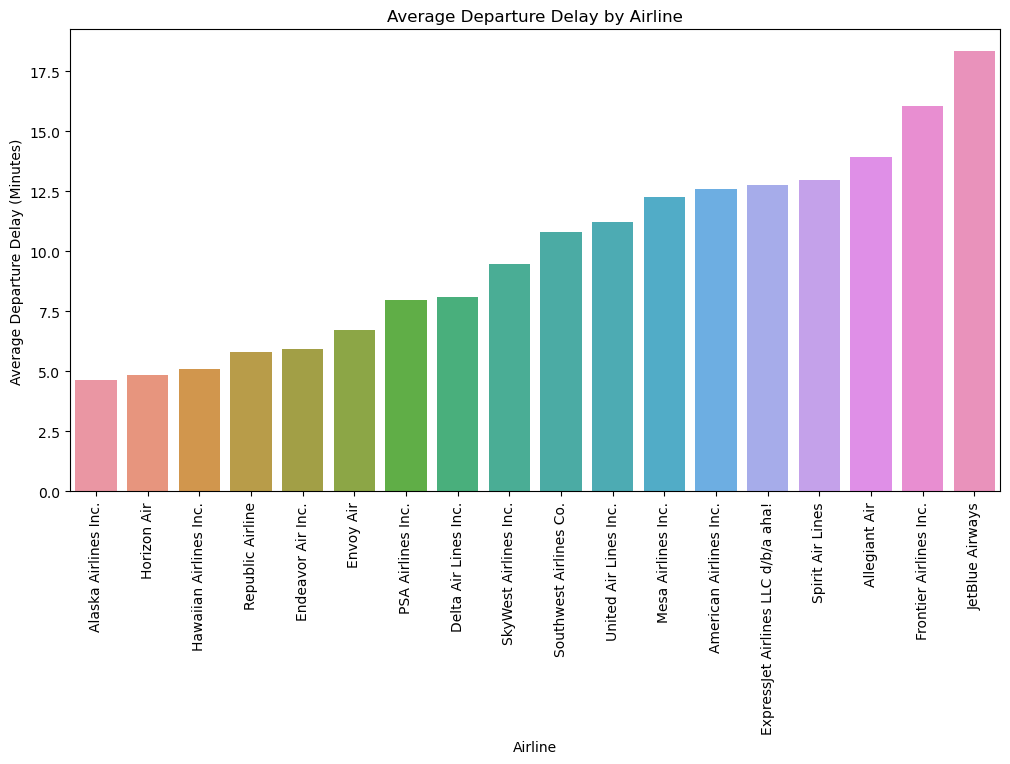

In [ ]:
# Average departure delay of each airline
airline_delay = df.groupby('AIRLINE')['DEP_DELAY'].mean().sort_values()
print(airline_delay)
plt.figure(figsize=(12, 6))
sns.barplot(x=airline_delay.index, y=airline_delay.values)
plt.title('Average Departure Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Departure Delay (Minutes)')
plt.xticks(rotation=90)
plt.show()

AIRLINE
Endeavor Air Inc.                     13.454694
Republic Airline                      14.949030
Horizon Air                           15.485111
SkyWest Airlines Inc.                 16.463337
Envoy Air                             17.031539
Delta Air Lines Inc.                  17.089734
PSA Airlines Inc.                     17.988715
Hawaiian Airlines Inc.                18.017649
Alaska Airlines Inc.                  18.905654
Mesa Airlines Inc.                    19.366366
ExpressJet Airlines LLC d/b/a aha!    19.874639
United Air Lines Inc.                 21.429002
American Airlines Inc.                22.019595
Spirit Air Lines                      24.473152
Allegiant Air                         26.950186
Southwest Airlines Co.                27.196309
Frontier Airlines Inc.                29.537282
JetBlue Airways                       29.978522
Name: delay_percentage, dtype: float64


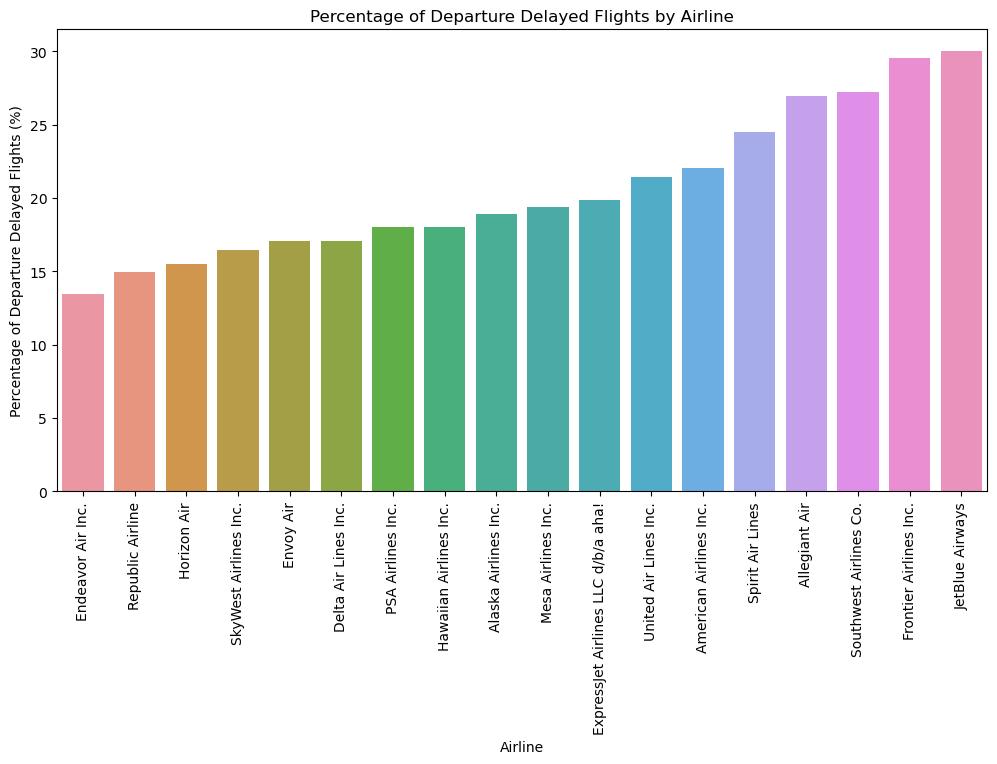

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a delay flag (1 if delayed, 0 if not delayed)
df['DELAY_FLAG'] = df['DEP_DELAY'].apply(lambda x: 1 if x > 10 else 0)

# Step 2: Calculate the total flights and delayed flights for each airline
airline_delay_counts = df.groupby('AIRLINE').agg(
    total_flights=('DEP_DELAY', 'count'),
    delayed_flights=('DELAY_FLAG', 'sum')
)

# Step 3: Calculate the percentage of delayed flights for each airline
airline_delay_counts['delay_percentage'] = (airline_delay_counts['delayed_flights'] / airline_delay_counts['total_flights']) * 100

# Step 4: Sort the airlines by the percentage of delayed flights
airline_delay_counts_sorted = airline_delay_counts.sort_values(by='delay_percentage', ascending=True)

# Step 5: Print the percentage of delayed flights by airline
print(airline_delay_counts_sorted['delay_percentage'])

# Step 6: Visualize the percentage of delayed flights by airline
plt.figure(figsize=(12, 6))
sns.barplot(x=airline_delay_counts_sorted.index, y=airline_delay_counts_sorted['delay_percentage'])
plt.title('Percentage of Departure Delayed Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Percentage of Departure Delayed Flights (%)')
plt.xticks(rotation=90)
plt.show()

AIRLINE
Endeavor Air Inc.                     -1.258539
Republic Airline                       0.590176
Delta Air Lines Inc.                   1.085079
Alaska Airlines Inc.                   1.097900
Horizon Air                            2.376242
Southwest Airlines Co.                 3.269796
Envoy Air                              3.278914
Hawaiian Airlines Inc.                 3.894757
PSA Airlines Inc.                      3.928655
SkyWest Airlines Inc.                  4.023311
United Air Lines Inc.                  5.035985
American Airlines Inc.                 6.661229
Mesa Airlines Inc.                     7.309810
Spirit Air Lines                       8.029485
ExpressJet Airlines LLC d/b/a aha!    10.031976
Frontier Airlines Inc.                11.100429
JetBlue Airways                       12.276125
Allegiant Air                         13.284601
Name: ARR_DELAY, dtype: float64


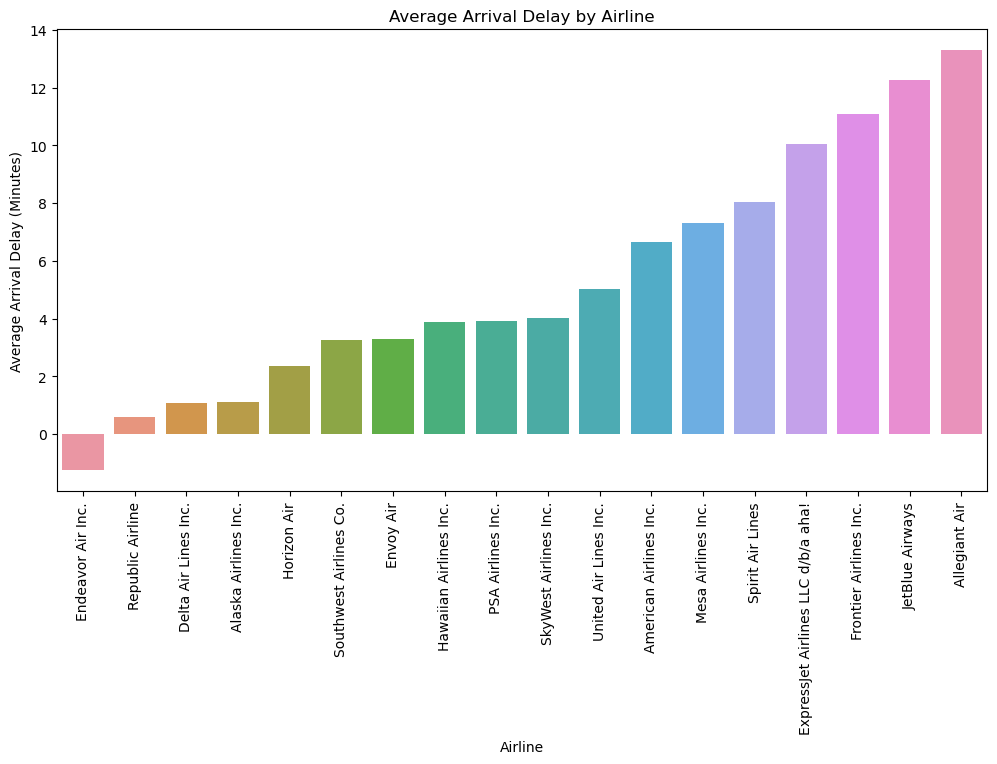

In [ ]:
# Average arrival delay of each airline
airline_arrival_delay = df.groupby('AIRLINE')['ARR_DELAY'].mean().sort_values()
print(airline_arrival_delay)
# Visualize the average arrival delay by airline
plt.figure(figsize=(12, 6))
sns.barplot(x=airline_arrival_delay.index, y=airline_arrival_delay.values)
plt.title('Average Arrival Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Arrival Delay (Minutes)')
plt.xticks(rotation=90)
plt.show()

AIRLINE
Endeavor Air Inc.                     14.900590
Delta Air Lines Inc.                  17.022974
Horizon Air                           17.744725
Republic Airline                      18.248677
SkyWest Airlines Inc.                 18.362558
PSA Airlines Inc.                     20.215881
Envoy Air                             20.442921
Hawaiian Airlines Inc.                20.676383
Mesa Airlines Inc.                    21.487908
Alaska Airlines Inc.                  21.914868
United Air Lines Inc.                 22.047771
Southwest Airlines Co.                22.723879
American Airlines Inc.                22.985685
ExpressJet Airlines LLC d/b/a aha!    24.254916
Spirit Air Lines                      25.266094
Frontier Airlines Inc.                29.774681
Allegiant Air                         29.829211
JetBlue Airways                       29.954224
Name: delay_percentage, dtype: float64


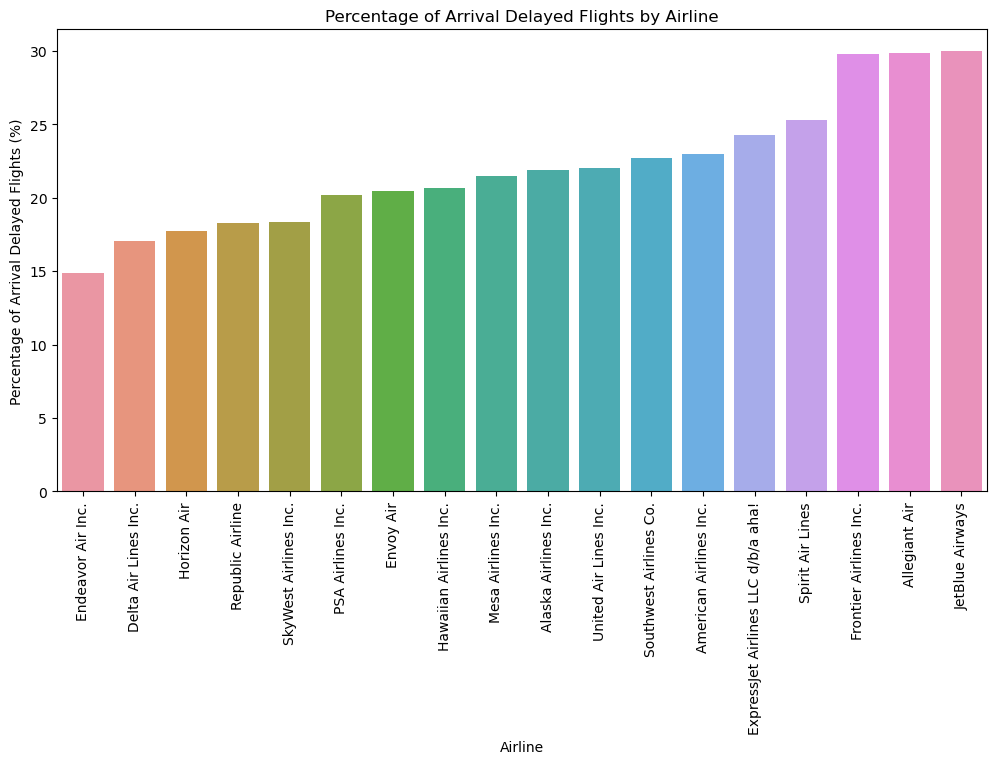

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a delay flag (1 if delayed, 0 if not delayed) based on arrival delay
df['ARRIVAL_DELAY_FLAG'] = df['ARR_DELAY'].apply(lambda x: 1 if x > 10 else 0)

# Step 2: Calculate the total flights and delayed flights for each airline based on arrival delay
airline_arrival_delay_counts = df.groupby('AIRLINE').agg(
    total_flights=('ARR_DELAY', 'count'),
    delayed_flights=('ARRIVAL_DELAY_FLAG', 'sum')
)

# Step 3: Calculate the percentage of delayed flights for each airline based on arrival delay
airline_arrival_delay_counts['delay_percentage'] = (airline_arrival_delay_counts['delayed_flights'] / airline_arrival_delay_counts['total_flights']) * 100

# Step 4: Sort the airlines by the percentage of delayed flights based on arrival delay
airline_arrival_delay_counts_sorted = airline_arrival_delay_counts.sort_values(by='delay_percentage', ascending=True)

# Step 5: Print the percentage of delayed flights by airline based on arrival delay
print(airline_arrival_delay_counts_sorted['delay_percentage'])

# Step 6: Visualize the percentage of delayed flights by airline based on arrival delay
plt.figure(figsize=(12, 6))
sns.barplot(x=airline_arrival_delay_counts_sorted.index, y=airline_arrival_delay_counts_sorted['delay_percentage'])
plt.title('Percentage of Arrival Delayed Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Percentage of Arrival Delayed Flights (%)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import pandas as pd
# Airline Performance based on Carrier and Late Aircraft.
# Load the dataset (replace with your actual dataset path)
df = pd.read_csv('/Users/zhangzixian/Desktop/flights_sample_3m.csv')

# Ensure relevant columns are present
df = df[['AIRLINE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_LATE_AIRCRAFT']]

# Step 1: Create binary columns to indicate whether there was a delay due to carrier or late aircraft
df['Carrier_Delay'] = (df['DELAY_DUE_CARRIER'] > 0).astype(int)
df['Late_Aircraft_Delay'] = (df['DELAY_DUE_LATE_AIRCRAFT'] > 0).astype(int)

# Step 2: Calculate total flights and delay rates for each airline
# Total flights by airline
total_flights_by_airline = df.groupby('AIRLINE').size().reset_index(name='Total_Flights')

# Delays due to carrier by airline
carrier_delay_by_airline = df.groupby('AIRLINE')['Carrier_Delay'].sum().reset_index(name='Carrier_Delays')

# Delays due to late aircraft by airline
late_aircraft_delay_by_airline = df.groupby('AIRLINE')['Late_Aircraft_Delay'].sum().reset_index(name='Late_Aircraft_Delays')

# Merge total flights with delay counts
airline_delay_data = total_flights_by_airline.merge(carrier_delay_by_airline, on='AIRLINE')
airline_delay_data = airline_delay_data.merge(late_aircraft_delay_by_airline, on='AIRLINE')

# Step 3: Calculate delay rates
airline_delay_data['Carrier_Delay_Rate'] = airline_delay_data['Carrier_Delays'] / airline_delay_data['Total_Flights']
airline_delay_data['Late_Aircraft_Delay_Rate'] = airline_delay_data['Late_Aircraft_Delays'] / airline_delay_data['Total_Flights']

# Step 4: Sort airlines by delay rates to find those with lower rates
carrier_sorted = airline_delay_data[['AIRLINE', 'Carrier_Delay_Rate']].sort_values(by='Carrier_Delay_Rate')
late_aircraft_sorted = airline_delay_data[['AIRLINE', 'Late_Aircraft_Delay_Rate']].sort_values(by='Late_Aircraft_Delay_Rate')

# Print results
print("Airlines with Lowest Carrier Delay Rates:")
print(carrier_sorted)

print("\nAirlines with Lowest Late Aircraft Delay Rates:")
print(late_aircraft_sorted)


Airlines with Lowest Carrier Delay Rates:
                               AIRLINE  Carrier_Delay_Rate
4                    Endeavor Air Inc.            0.052213
13                    Republic Airline            0.059850
0                 Alaska Airlines Inc.            0.065534
9                          Horizon Air            0.067074
5                            Envoy Air            0.073093
3                 Delta Air Lines Inc.            0.077664
6   ExpressJet Airlines LLC d/b/a aha!            0.078084
11                  Mesa Airlines Inc.            0.081754
14               SkyWest Airlines Inc.            0.082985
12                   PSA Airlines Inc.            0.083540
17               United Air Lines Inc.            0.100407
16                    Spirit Air Lines            0.107072
1                        Allegiant Air            0.111191
2               American Airlines Inc.            0.111220
15              Southwest Airlines Co.            0.123245
8             

In [ ]:
#adjust the weights to reflect the importance of each delay type
carrier_weight = 0.6
late_aircraft_weight = 0.4
airline_delay_data['Weighted_Combined_Delay_Rate'] = (airline_delay_data['Carrier_Delay_Rate'] * carrier_weight +
                                                     airline_delay_data['Late_Aircraft_Delay_Rate'] * late_aircraft_weight)

# Step 5: Sort airlines by combined delay rate to find those with lower rates
weighted_combined_sorted = airline_delay_data[['AIRLINE', 'Weighted_Combined_Delay_Rate']].sort_values(by='Weighted_Combined_Delay_Rate')

print("\nAirlines with Lowest Combined Delay Rates (Weighted Average):")
print(weighted_combined_sorted)



Airlines with Lowest Combined Delay Rates (Weighted Average):
                               AIRLINE  Weighted_Combined_Delay_Rate
4                    Endeavor Air Inc.                      0.054589
13                    Republic Airline                      0.061804
9                          Horizon Air                      0.063371
0                 Alaska Airlines Inc.                      0.064853
3                 Delta Air Lines Inc.                      0.068148
14               SkyWest Airlines Inc.                      0.069091
5                            Envoy Air                      0.077411
11                  Mesa Airlines Inc.                      0.079059
6   ExpressJet Airlines LLC d/b/a aha!                      0.081291
12                   PSA Airlines Inc.                      0.086462
16                    Spirit Air Lines                      0.092177
17               United Air Lines Inc.                      0.093586
2               American Airlines Inc.  

Airline Performance by Season (Average Arrival Delay):
    Season                 AIRLINE  ARR_DELAY
0     Fall    Alaska Airlines Inc.  -1.454958
1     Fall           Allegiant Air   9.227180
2     Fall  American Airlines Inc.   2.288279
3     Fall    Delta Air Lines Inc.  -2.258339
4     Fall       Endeavor Air Inc.  -4.122636
..     ...                     ...        ...
67  Winter        Republic Airline   0.333136
68  Winter   SkyWest Airlines Inc.   6.700909
69  Winter  Southwest Airlines Co.   1.498787
70  Winter        Spirit Air Lines   7.130255
71  Winter   United Air Lines Inc.   4.477904

[72 rows x 3 columns]


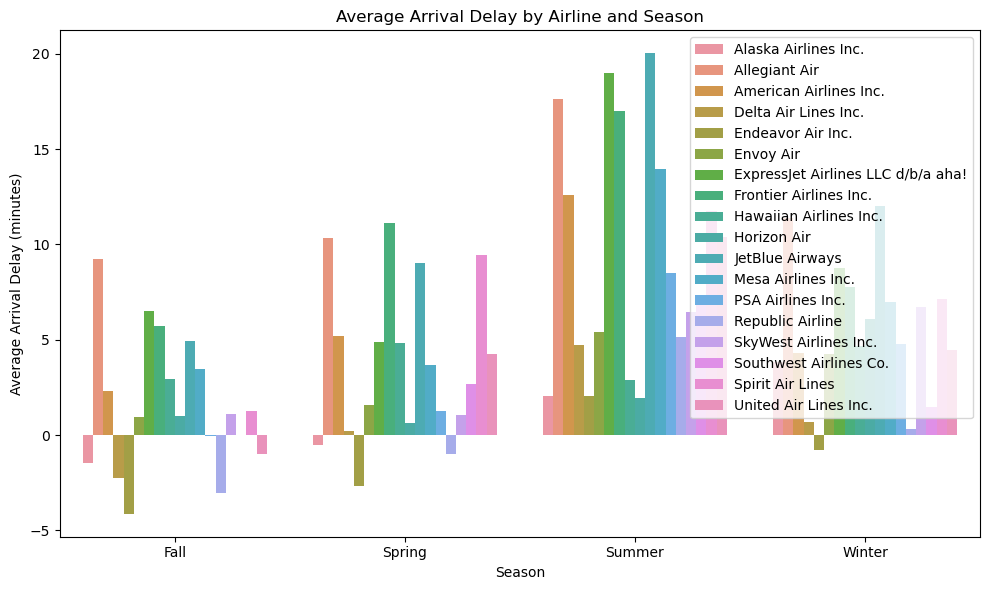

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/Users/zhangzixian/Desktop/flights_sample_3m.csv')

# Step 1: Fill NaN values with 0
df_filled = df.fillna(0)

# Step 2: Extract the month from the flight date (assuming 'FL_DATE' is in your dataset)
df_filled['FL_DATE'] = pd.to_datetime(df_filled['FL_DATE'])
df_filled['Month'] = df_filled['FL_DATE'].dt.month

# Step 3: Create a 'Season' column based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_filled['Season'] = df_filled['Month'].apply(get_season)

# Step 4: Keep the 'AIRLINE' column for grouping and create dummy variables for analysis
df_filled_dummies = pd.get_dummies(df_filled, columns=['AIRLINE'], drop_first=True)

# Step 5: Group by 'AIRLINE' and 'Season' to calculate performance
# For example, calculating the average delay per airline per season
airline_performance = df_filled.groupby(['Season', 'AIRLINE'])['ARR_DELAY'].mean().reset_index()

# Step 6: Analyze performance
print("Airline Performance by Season (Average Arrival Delay):")
print(airline_performance)

# Step 7: Visualize the performance
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='ARR_DELAY', hue='AIRLINE', data=airline_performance)
plt.title('Average Arrival Delay by Airline and Season')
plt.xlabel('Season')
plt.ylabel('Average Arrival Delay (minutes)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [ ]:
# Filter for winter season airline performance and sort in ascending order
winter_performance = airline_performance[airline_performance['Season'] == 'Winter'].sort_values(by='ARR_DELAY', ascending=True)

# Print winter season airline performance in ascending order
print("Winter Season Airline Performance (Average Arrival Delay) in Ascending Order:")
print(winter_performance)


Winter Season Airline Performance (Average Arrival Delay) in Ascending Order:
    Season                             AIRLINE  ARR_DELAY
58  Winter                   Endeavor Air Inc.  -0.789886
67  Winter                    Republic Airline   0.333136
57  Winter                Delta Air Lines Inc.   0.703432
69  Winter              Southwest Airlines Co.   1.498787
54  Winter                Alaska Airlines Inc.   3.819679
59  Winter                           Envoy Air   4.231835
56  Winter              American Airlines Inc.   4.332569
71  Winter               United Air Lines Inc.   4.477904
62  Winter              Hawaiian Airlines Inc.   4.655143
66  Winter                   PSA Airlines Inc.   4.761340
63  Winter                         Horizon Air   6.102447
68  Winter               SkyWest Airlines Inc.   6.700909
65  Winter                  Mesa Airlines Inc.   7.004466
70  Winter                    Spirit Air Lines   7.130255
61  Winter              Frontier Airlines Inc.   7.7

Airport Delay Performance

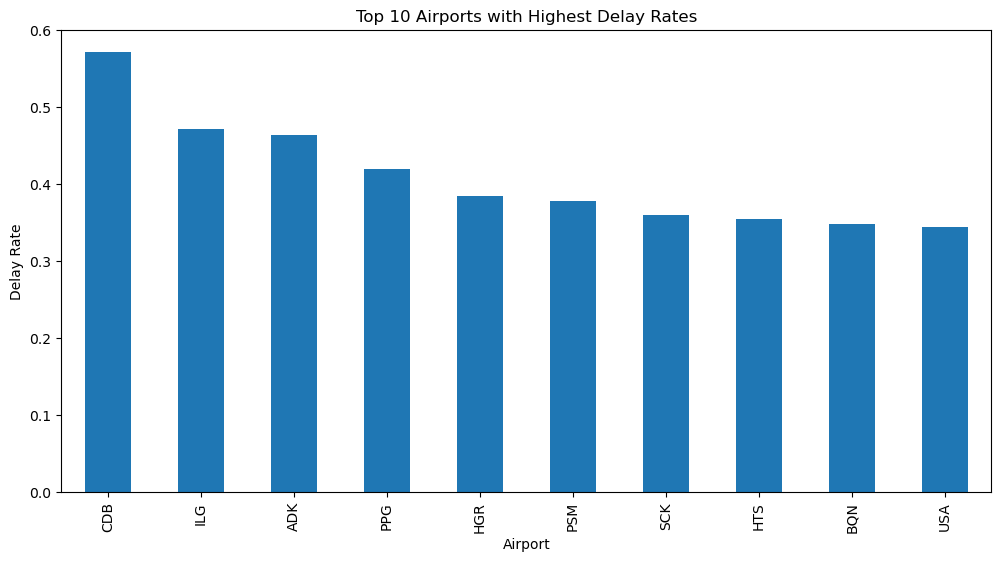

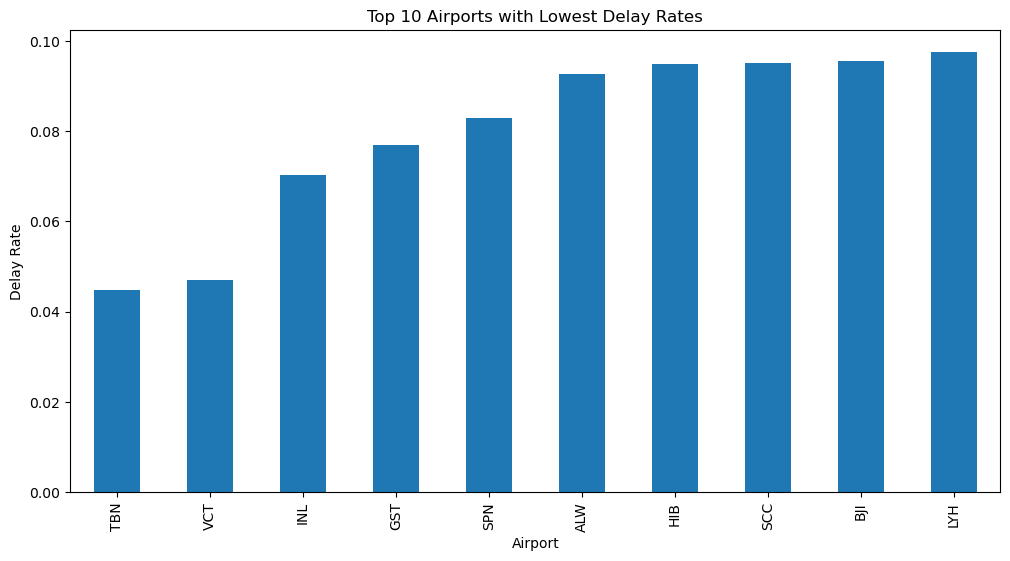

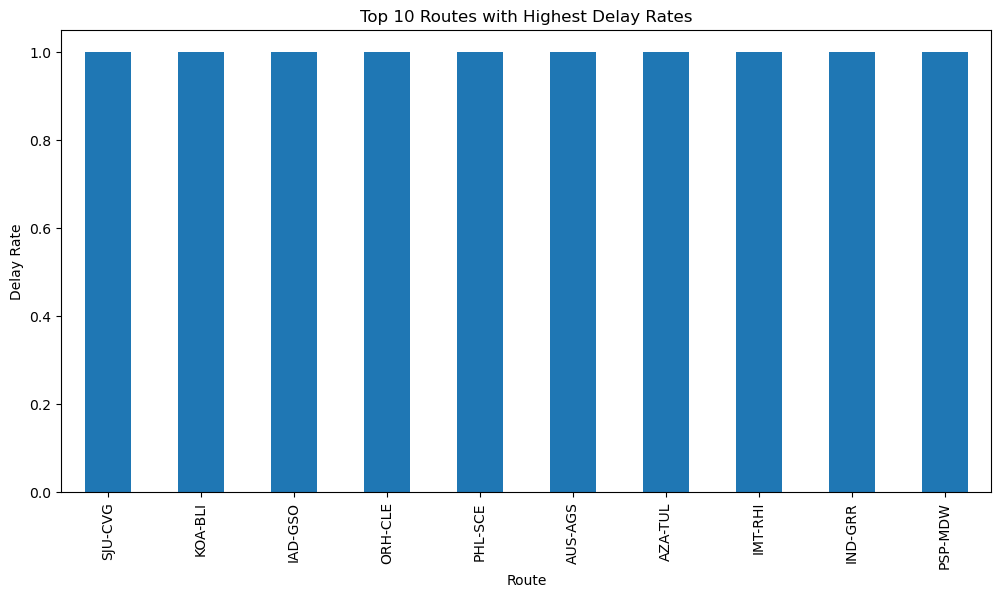

In [ ]:
# Delay rate by airport
airport_delay_rate = df.groupby('ORIGIN')['Delayed'].mean().sort_values(ascending=False)

# Draw Top 10 airport with highest delay rate
plt.figure(figsize=(12, 6))
airport_delay_rate.head(10).plot(kind='bar')
plt.title('Top 10 Airports with Highest Delay Rates')
plt.xlabel('Airport')
plt.ylabel('Delay Rate')
plt.show()

# Draw Top 10 airport with lowest delay rate
airport_delay_rate = df.groupby('ORIGIN')['Delayed'].mean().sort_values(ascending=True)

# Draw Top 10 airport with lowest delay rate
plt.figure(figsize=(12, 6))
airport_delay_rate.head(10).plot(kind='bar')
plt.title('Top 10 Airports with Lowest Delay Rates')
plt.xlabel('Airport')
plt.ylabel('Delay Rate')
plt.show()

# Delay rate by Route
df['Route'] = df['ORIGIN'] + '-' + df['DEST']
route_delay_rate = df.groupby('Route')['Delayed'].mean().sort_values(ascending=False)

# Draw Top 10 Route with highest delay rates
plt.figure(figsize=(12, 6))
route_delay_rate.head(10).plot(kind='bar')
plt.title('Top 10 Routes with Highest Delay Rates')
plt.xlabel('Route')
plt.ylabel('Delay Rate')
plt.show()


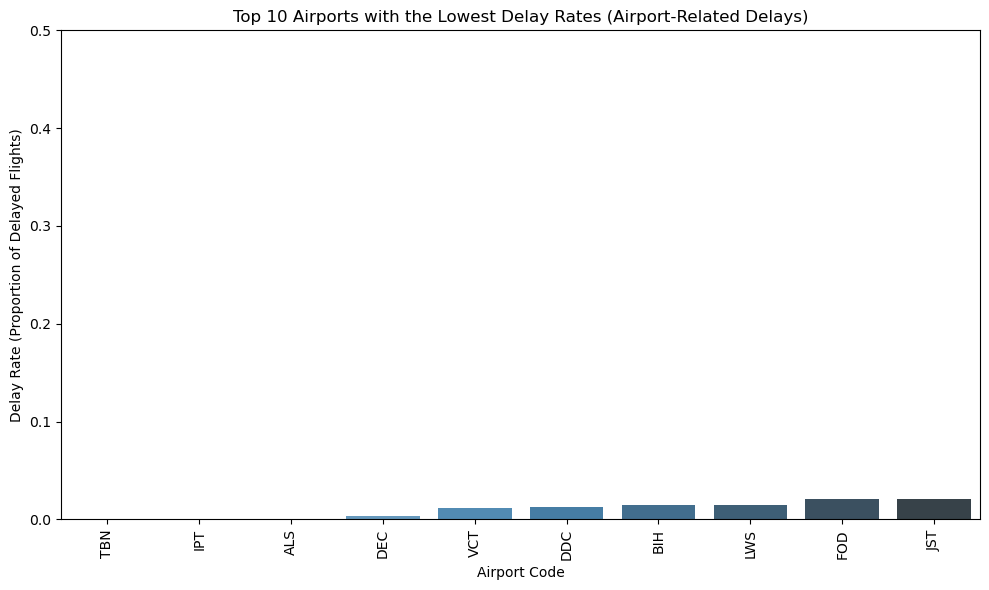

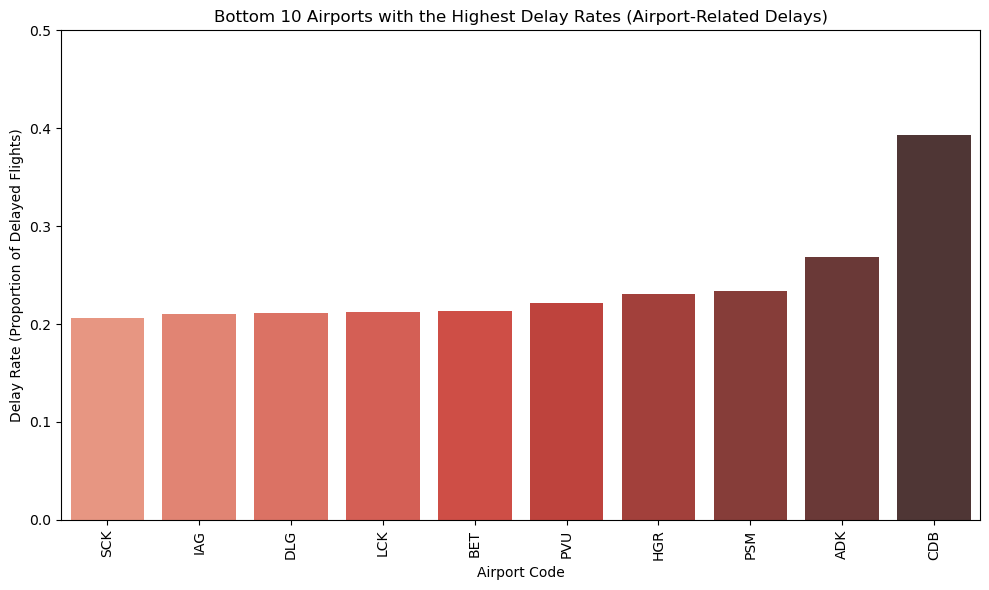

In [ ]:
#Airport Performance based on NAS, Security and Weather
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/Users/zhangzixian/Desktop/flights_sample_3m.csv')

# Fill NaN values with 0 for delay reasons
df_filled = df.fillna(0)

# Step 1: Create a total delay column for airport-related delays
df_filled['Total_Airport_Delay'] = df_filled['DELAY_DUE_WEATHER'] + df_filled['DELAY_DUE_NAS'] + df_filled['DELAY_DUE_SECURITY']

# Step 2: Create a binary column indicating if a flight was delayed due to any airport-related reason
df_filled['Airport_Delay_Flag'] = (df_filled['Total_Airport_Delay'] > 0).astype(int)

# Step 3: Group by 'ORIGIN' (airport) and calculate the delay rate
airport_delay_rate = df_filled.groupby('ORIGIN')['Airport_Delay_Flag'].mean().reset_index()

# Rename the columns for clarity
airport_delay_rate = airport_delay_rate.rename(columns={'Airport_Delay_Flag': 'Delay_Rate'})

# Step 4: Sort the airports by delay rate in ascending order
airport_delay_rate_sorted = airport_delay_rate.sort_values(by='Delay_Rate', ascending=True)

# Step 5: Select the top 10 airports with the lowest delay rates
top_10_airports = airport_delay_rate_sorted.head(10)

# Step 6: Select the bottom 10 airports with the highest delay rates
bottom_10_airports = airport_delay_rate_sorted.tail(10)

# Step 7: Visualize the top 10 and bottom 10 airports

# Top 10 Airports with the Lowest Delay Rates
plt.figure(figsize=(10, 6))
sns.barplot(x='ORIGIN', y='Delay_Rate', data=top_10_airports, palette='Blues_d')
plt.title('Top 10 Airports with the Lowest Delay Rates (Airport-Related Delays)')
plt.xlabel('Airport Code')
plt.ylabel('Delay Rate (Proportion of Delayed Flights)')
plt.ylim(0, 0.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Bottom 10 Airports with the Highest Delay Rates
plt.figure(figsize=(10, 6))
sns.barplot(x='ORIGIN', y='Delay_Rate', data=bottom_10_airports, palette='Reds_d')
plt.title('Bottom 10 Airports with the Highest Delay Rates (Airport-Related Delays)')
plt.xlabel('Airport Code')
plt.ylabel('Delay Rate (Proportion of Delayed Flights)')
plt.ylim(0, 0.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Analysis of Flight Cancellations

Cancelled flight rate: 2.64%
Diverted flight rate: 0.24%
Cancellation Reasons with Counts and Percentages:
Weather: 28772 incidents (36.36%)
Security: 24417 incidents (30.85%)
Carrier: 19476 incidents (24.61%)
National Air System: 6475 incidents (8.18%)


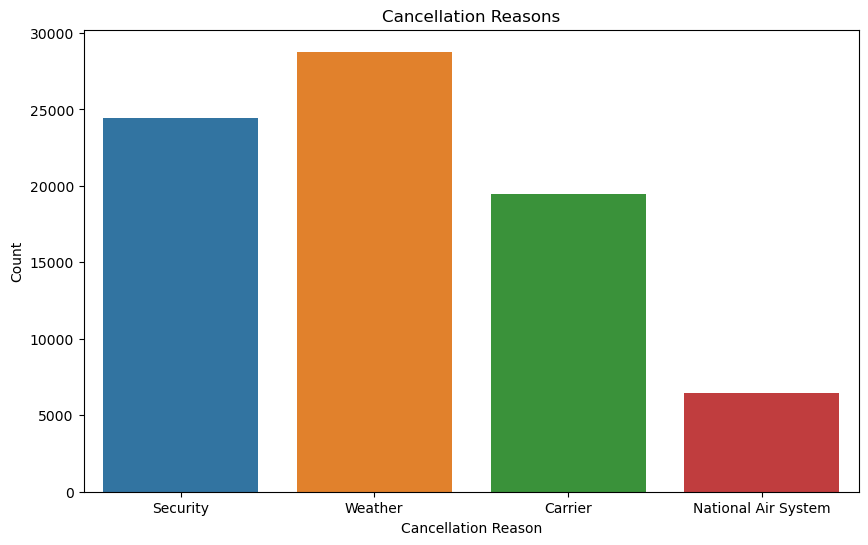

In [ ]:
# Cancelation Causes & data overview
df = pd.read_csv('/Users/zhangzixian/Desktop/flights_sample_3m.csv')

# Rate of canceled
cancelled_rate = df['CANCELLED'].value_counts(normalize=True) * 100
print(f"Cancelled flight rate: {cancelled_rate[1]:.2f}%")

# Rate of diverted
diverted_rate = df['DIVERTED'].value_counts(normalize=True) * 100
print(f"Diverted flight rate: {diverted_rate[1]:.2f}%")

# Cancellation Reasons
cancellation_code_mapping = {
    'A': 'Carrier',
    'B': 'Weather',
    'C': 'National Air System',
    'D': 'Security'
}

df['CANCELLATION_DESCRIPTION'] = df['CANCELLATION_CODE'].map(cancellation_code_mapping)

# Calculate the counts and percentages for each cancellation reason
cancellation_counts = df['CANCELLATION_DESCRIPTION'].value_counts()
cancellation_percentages = df['CANCELLATION_DESCRIPTION'].value_counts(normalize=True) * 100

# Print the incidents and percentages for each cancellation reason
print("Cancellation Reasons with Counts and Percentages:")
for reason, count in cancellation_counts.items():
    percentage = cancellation_percentages[reason]
    print(f"{reason}: {count} incidents ({percentage:.2f}%)")

# Plot the updated visualization with cancellation descriptions
plt.figure(figsize=(10, 6))
sns.countplot(x='CANCELLATION_DESCRIPTION', data=df)
plt.title('Cancellation Reasons')
plt.xlabel('Cancellation Reason')
plt.ylabel('Count')
plt.show()


Monday       11939
Tuesday      10294
Wednesday    11356
Thursday     12655
Friday       11605
Saturday      9645
Sunday       11646
Name: CANCELLED, dtype: int64


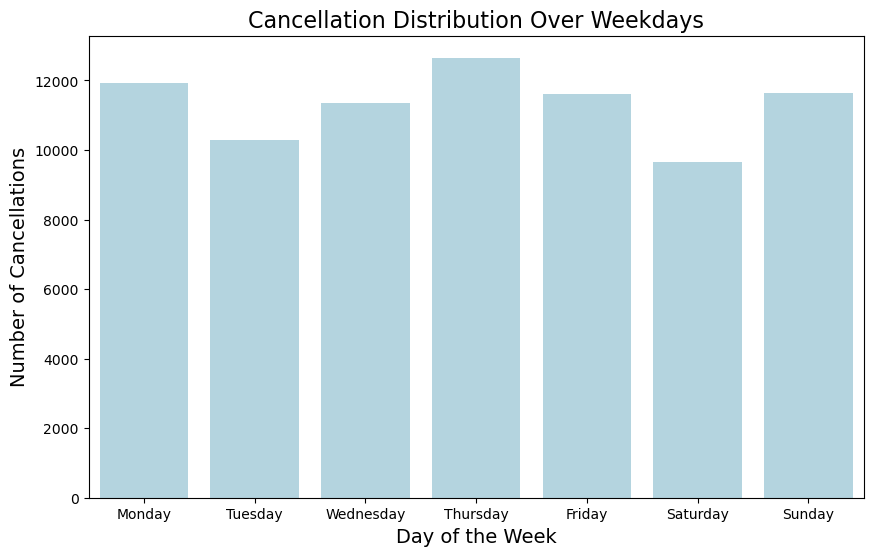

In [ ]:
# Cancelation distribution over the week
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'FL_DATE' column to datetime format if not already
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], errors='coerce')

# Extract the day of the week from the 'FL_DATE' column (Monday=0, Sunday=6)
df['Weekday'] = df['FL_DATE'].dt.weekday

# Convert 'CANCELLED' to integer for proper counting
df['CANCELLED'] = df['CANCELLED'].astype(int)

# Group by 'Weekday' and count the number of cancellations
weekday_cancellations = df.groupby('Weekday')['CANCELLED'].sum()

# Map the numeric weekday to actual names
weekday_cancellations.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Print the cancellation counts for each weekday
print(weekday_cancellations)

# Visualize the cancellation distribution over weekdays
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_cancellations.index, y=weekday_cancellations.values, color='lightblue')
plt.title('Cancellation Distribution Over Weekdays', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Cancellations', fontsize=14)
plt.show()


Month
1      7347
2      7188
3     14740
4     17396
5      4341
6      5256
7      5097
8      5702
9      2655
10     2352
11     1668
12     5398
Name: CANCELLED, dtype: int64


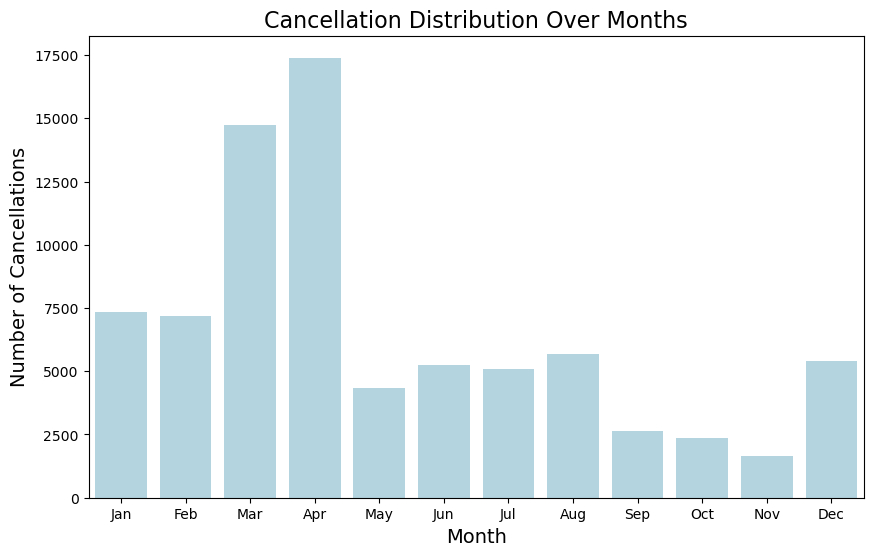

In [ ]:
#Cancelation distribution over Months
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'FL_DATE' column to datetime format if not already
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], errors='coerce')

# Extract the month from the 'FL_DATE' column
df['Month'] = df['FL_DATE'].dt.month

# Convert 'CANCELLED' to integer for proper counting
df['CANCELLED'] = df['CANCELLED'].astype(int)

# Group by 'Month' and count the number of cancellations
monthly_cancellations = df.groupby('Month')['CANCELLED'].sum()

# Print the cancellation counts for each month
print(monthly_cancellations)

# Visualize the cancellation distribution over months
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_cancellations.index, y=monthly_cancellations.values, color='lightblue')
plt.title('Cancellation Distribution Over Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Cancellations', fontsize=14)
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


Year
2019    13594
2020    28757
2021    10532
2022    18448
2023     7809
Name: CANCELLED, dtype: int64


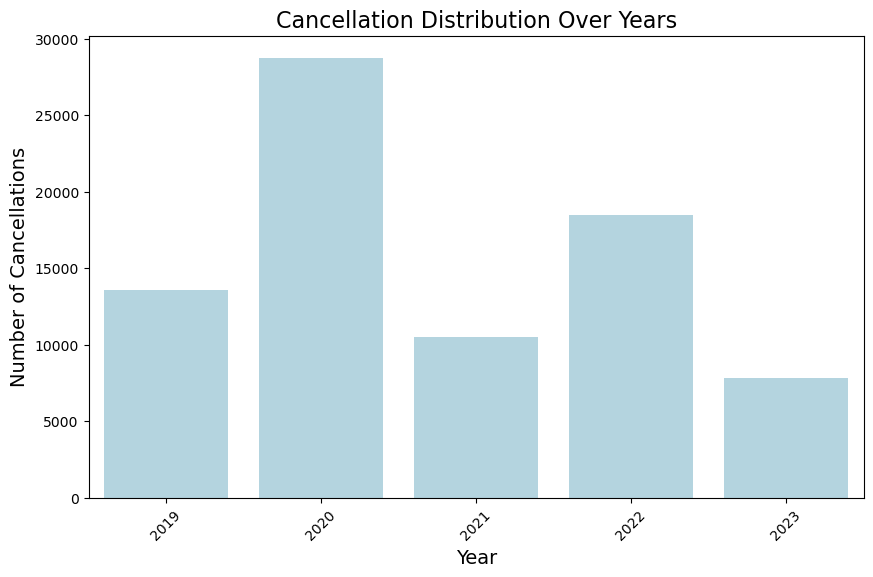

In [ ]:
# Cancellation Distribution Over Years
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'FL_DATE' column to datetime format if not already
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], errors='coerce')

# Extract the year from the 'FL_DATE' column
df['Year'] = df['FL_DATE'].dt.year

# Convert 'CANCELLED' to integer for proper counting
df['CANCELLED'] = df['CANCELLED'].astype(int)

# Group by 'Year' and count the number of cancellations
yearly_cancellations = df.groupby('Year')['CANCELLED'].sum()

# Print the cancellation counts for each year
print(yearly_cancellations)

# Visualize the cancellation distribution over years
plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_cancellations.index, y=yearly_cancellations.values, color='lightblue')
plt.title('Cancellation Distribution Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Cancellations', fontsize=14)
plt.xticks(rotation=45)  # Rotate the x-axis labels if necessary
plt.show()


Airline Cancelation Performance

'AIRLINE' column is present and will be used for grouping.
Seasonal Performance by Airline (Cancellation Rate):
    Season                 AIRLINE  Cancellation_Rate
0     Fall    Alaska Airlines Inc.           0.008784
1     Fall           Allegiant Air           0.014515
2     Fall  American Airlines Inc.           0.013528
3     Fall    Delta Air Lines Inc.           0.004048
4     Fall       Endeavor Air Inc.           0.004899
..     ...                     ...                ...
67  Winter        Republic Airline           0.031672
68  Winter   SkyWest Airlines Inc.           0.033559
69  Winter  Southwest Airlines Co.           0.038533
70  Winter        Spirit Air Lines           0.022981
71  Winter   United Air Lines Inc.           0.017610

[72 rows x 3 columns]


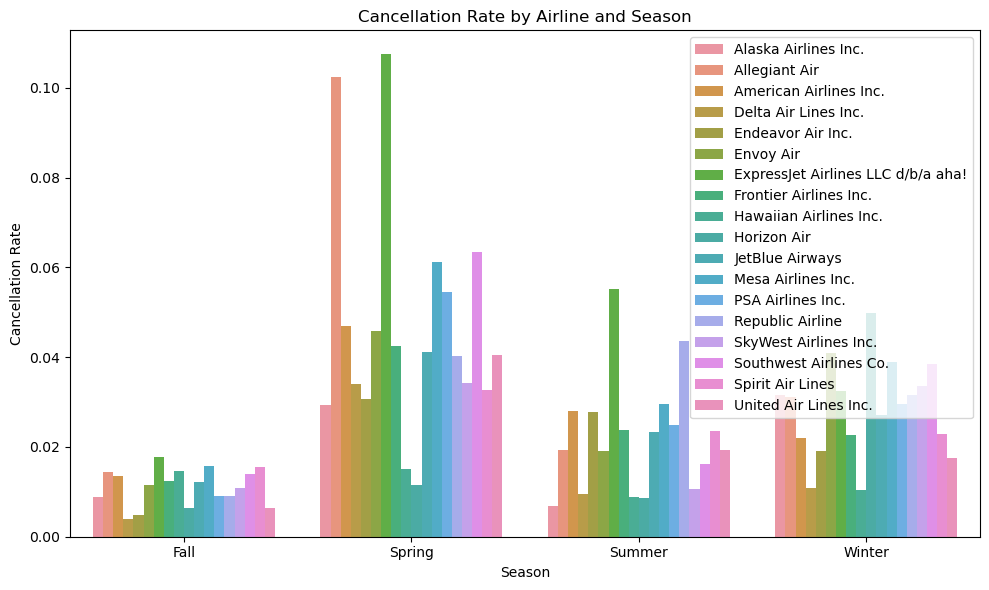

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/Users/zhangzixian/Desktop/flights_sample_3m.csv')

# Step 1: Fill NaN values with 0
df_filled = df.fillna(0)

# Step 2: Extract the month from the flight date (assuming 'FL_DATE' is in your dataset)
df_filled['FL_DATE'] = pd.to_datetime(df_filled['FL_DATE'])
df_filled['Month'] = df_filled['FL_DATE'].dt.month

# Step 3: Create a 'Season' column based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_filled['Season'] = df_filled['Month'].apply(get_season)

# Step 4: Ensure 'AIRLINE' is still present and usable for grouping
if 'AIRLINE' in df_filled.columns:
    print("'AIRLINE' column is present and will be used for grouping.")
else:
    raise KeyError("'AIRLINE' column not found in the dataset. Check if it's correctly loaded.")

# Step 5: Calculate cancellation rate by airline and season
# Assuming 'CANCELLED' is a binary column (1 = canceled, 0 = not canceled)
airline_cancellation_rate = df_filled.groupby(['Season', 'AIRLINE'])['CANCELLED'].mean().reset_index()

# Rename the cancellation rate column for clarity
airline_cancellation_rate = airline_cancellation_rate.rename(columns={'CANCELLED': 'Cancellation_Rate'})

# Step 6: Analyze performance by cancellation rate
print("Seasonal Performance by Airline (Cancellation Rate):")
print(airline_cancellation_rate)

# Step 7: Visualize the cancellation rate performance
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Cancellation_Rate', hue='AIRLINE', data=airline_cancellation_rate)
plt.title('Cancellation Rate by Airline and Season')
plt.xlabel('Season')
plt.ylabel('Cancellation Rate')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


AIRLINE
Horizon Air                             374
Hawaiian Airlines Inc.                  388
ExpressJet Airlines LLC d/b/a aha!     1062
Frontier Airlines Inc.                 1666
Alaska Airlines Inc.                   1934
Spirit Air Lines                       2312
Mesa Airlines Inc.                     2373
Allegiant Air                          2383
Endeavor Air Inc.                      2394
JetBlue Airways                        3039
PSA Airlines Inc.                      3301
Envoy Air                              3633
Republic Airline                       4646
United Air Lines Inc.                  5536
Delta Air Lines Inc.                   5982
SkyWest Airlines Inc.                  7745
American Airlines Inc.                10907
Southwest Airlines Co.                19465
Name: CANCELLED, dtype: int64


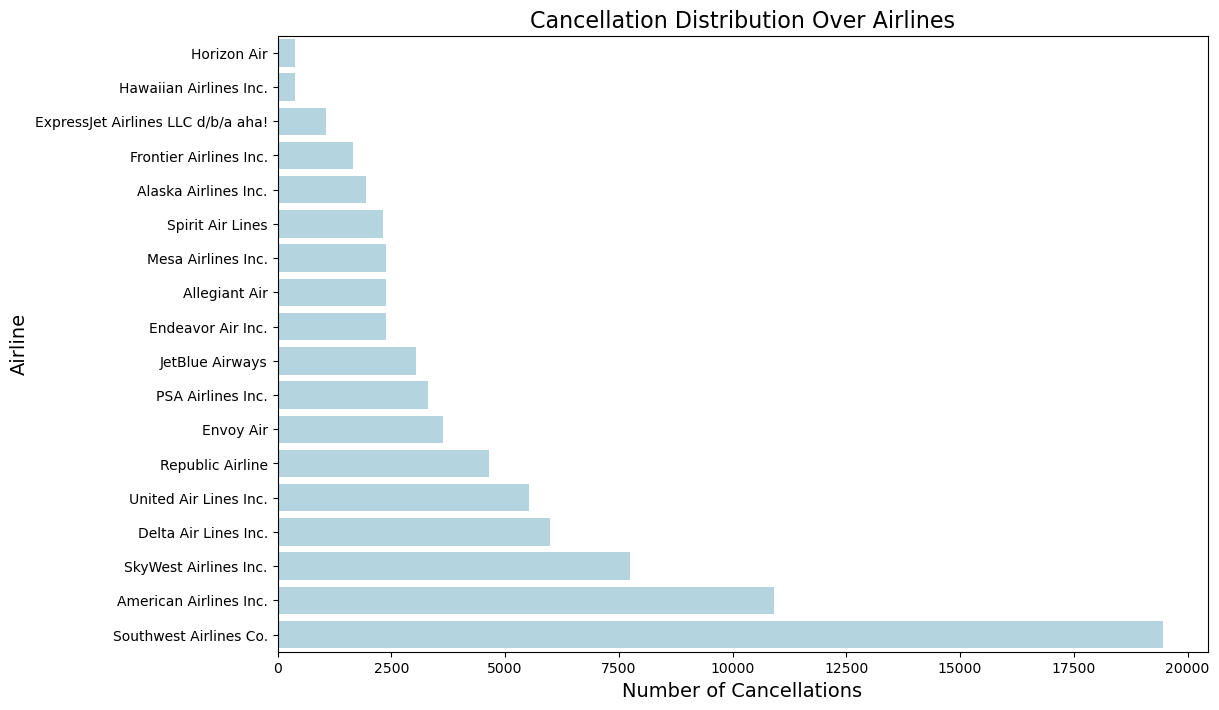

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'CANCELLED' to integer for proper counting
df['CANCELLED'] = df['CANCELLED'].astype(int)

# Group by 'AIRLINE' and count the number of cancellations
airline_cancellations = df.groupby('AIRLINE')['CANCELLED'].sum().sort_values()

# Print the cancellation counts for each airline, sorted from least to most
print(airline_cancellations)

# Visualize the cancellation distribution over airlines, sorted from least to most
plt.figure(figsize=(12, 8))
sns.barplot(x=airline_cancellations.values, y=airline_cancellations.index, color='lightblue')
plt.title('Cancellation Distribution Over Airlines', fontsize=16)
plt.xlabel('Number of Cancellations', fontsize=14)
plt.ylabel('Airline', fontsize=14)
plt.show()


Airport and City Cancelation Performance

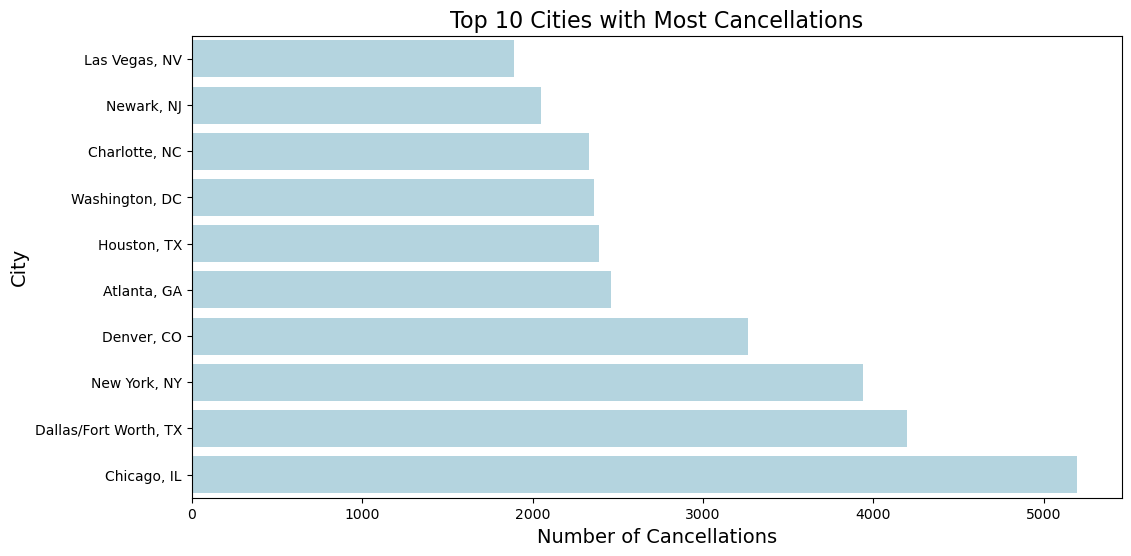

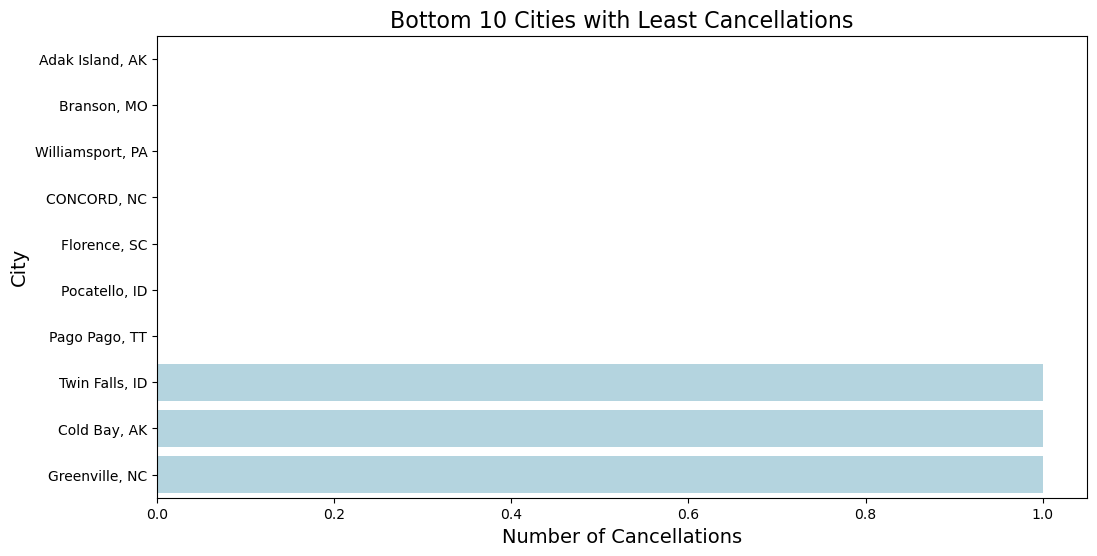

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'CANCELLED' to integer for proper counting
df['CANCELLED'] = df['CANCELLED'].astype(int)

# Group by 'ORIGIN_CITY' and sum the number of cancellations
city_cancellations = df.groupby('ORIGIN_CITY')['CANCELLED'].sum().sort_values()

# Top 10 cities with the most cancellations
top_10_cities = city_cancellations.tail(10)

# Bottom 10 cities with the least cancellations
bottom_10_cities = city_cancellations.head(10)

# Visualize the top 10 cities with the most cancellations
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index, color='lightblue')
plt.title('Top 10 Cities with Most Cancellations', fontsize=16)
plt.xlabel('Number of Cancellations', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.show()

# Visualize the bottom 10 cities with the least cancellations
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_10_cities.values, y=bottom_10_cities.index, color='lightblue')
plt.title('Bottom 10 Cities with Least Cancellations', fontsize=16)
plt.xlabel('Number of Cancellations', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Load the data with low_memory=False
df_raw = pd.read_csv('/Users/zhangzixian/Desktop/flights_reduced.csv')

# Check the loaded data
df_raw.head()

/var/folders/w5/j34nxfmx7kxdnfvfnyp9lsjm0000gn/T/ipykernel_21933/2902785820.py:5: DtypeWarning:

Columns (0,1,2,3,4,5,13) have mixed types. Specify dtype option on import or set low_memory=False.



,FL_DATE,AIRLINE,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,8/31/2023,JetBlue Airways,MIA,"Miami, FL",EWR,"Newark, NJ",1124.0,NaN,NaN,1437.0,...,0.0,193.0,NaN,NaN,1085.0,NaN,NaN,NaN,NaN,NaN
1,8/31/2023,Frontier Airlines Inc.,FLL,"Fort Lauderdale, FL",PHL,"Philadelphia, PA",530.0,NaN,NaN,820.0,...,0.0,170.0,NaN,NaN,992.0,NaN,NaN,NaN,NaN,NaN
2,8/31/2023,Frontier Airlines Inc.,RDU,"Raleigh/Durham, NC",BDL,"Hartford, CT",1455.0,NaN,NaN,1645.0,...,0.0,110.0,NaN,NaN,532.0,NaN,NaN,NaN,NaN,NaN
3,8/31/2023,American Airlines Inc.,FCA,"Kalispell, MT",DFW,"Dallas/Fort Worth, TX",1332.0,1241.0,1389.0,1804.0,...,0.0,212.0,205.0,176.0,1390.0,0.0,0.0,0.0,0.0,1382.0
4,8/31/2023,Frontier Airlines Inc.,DEN,"Denver, CO",LAS,"Las Vegas, NV",1025.0,1453.0,268.0,1128.0,...,0.0,123.0,113.0,86.0,628.0,258.0,0.0,0.0,0.0,0.0


Random Forest Model to predict flight cancelation

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048100 entries, 0 to 1048099
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   FL_DATE                  616629 non-null  object 
 1   AIRLINE                  616629 non-null  object 
 2   ORIGIN                   616629 non-null  object 
 3   ORIGIN_CITY              616629 non-null  object 
 4   DEST                     616629 non-null  object 
 5   DEST_CITY                616629 non-null  object 
 6   CRS_DEP_TIME             616629 non-null  float64
 7   DEP_TIME                 604046 non-null  float64
 8   DEP_DELAY                604037 non-null  float64
 9   CRS_ARR_TIME             616629 non-null  float64
 10  ARR_TIME                 603561 non-null  float64
 11  ARR_DELAY                602237 non-null  float64
 12  CANCELLED                616629 non-null  float64
 13  CANCELLATION_CODE        12919 non-null   object 
 14  DI

In [ ]:
import pandas as pd

# Load data
df_raw = pd.read_csv('/Users/zhangzixian/Desktop/flights_reduced.csv')

# Step 1: Standardize column names to avoid case sensitivity or extra spaces
df_raw.columns = df_raw.columns.str.strip()  # Remove leading/trailing spaces in column names
df_raw.columns = df_raw.columns.str.upper()  # Convert all column names to uppercase for consistency

# Step 2: Check if 'FL_DATE' exists and convert it to datetime format
if 'FL_DATE' in df_raw.columns:
    df_raw['FL_DATE'] = pd.to_datetime(df_raw['FL_DATE'], errors='coerce')
    df_raw = df_raw.rename(columns={'FL_DATE': 'Flight_Date'})
else:
    raise KeyError("Column 'FL_DATE' not found in the DataFrame")

# Step 3: Extract numeric components from the 'Flight_Date' column
df_raw['YEAR'] = df_raw['Flight_Date'].dt.year
df_raw['MONTH'] = df_raw['Flight_Date'].dt.month
df_raw['DAY_OF_WEEK'] = df_raw['Flight_Date'].dt.weekday + 1  # Monday=1, Sunday=7

# Step 4: Fill delay columns with 0 where delays didn't occur
delay_cols = ['DEP_DELAY', 'ARR_DELAY', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']
df_raw[delay_cols] = df_raw[delay_cols].fillna(0)

# Step 5: Fill cancellation-related columns
df_raw['CANCELLATION_CODE'] = df_raw['CANCELLATION_CODE'].fillna('Not Canceled')

# Step 6: Fill time-related columns with 0 (indicating no time recorded due to non-occurrence of the flight)
time_cols = ['DEP_TIME', 'ARR_TIME', 'ELAPSED_TIME', 'AIR_TIME']
df_raw[time_cols] = df_raw[time_cols].fillna(0)

# Step 7: Drop rows where 'YEAR', 'MONTH', or 'DAY_OF_WEEK' are missing
df = df_raw.dropna(subset=['YEAR', 'MONTH', 'DAY_OF_WEEK'])

# Step 8: Convert specified columns to categorical format
categorical_cols = ['AIRLINE', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY']
df[categorical_cols] = df[categorical_cols].astype('category')

# Step 9: Map cancellation codes to reasons and apply one-hot encoding
cancellation_code_mapping = {
    'A': 'Carrier',
    'B': 'Weather',
    'C': 'National Air System',
    'D': 'Security'
}
df['CANCELLATION_REASON'] = df['CANCELLATION_CODE'].map(cancellation_code_mapping)
df_one_hot = pd.get_dummies(df['CANCELLATION_REASON'], prefix='Cancelled_Due_To')

# Step 10: Concatenate one-hot encoded columns back to the dataframe and drop original columns
df = pd.concat([df, df_one_hot], axis=1)
df = df.drop(columns=['CANCELLATION_CODE', 'CANCELLATION_REASON'])

# Step 11: Convert 'Cancelled_Due_To_*' columns from bool to binary (0 and 1)
binary_cols = ['Cancelled_Due_To_Carrier',
               'Cancelled_Due_To_National Air System',
               'Cancelled_Due_To_Security',
               'Cancelled_Due_To_Weather']
df[binary_cols] = df[binary_cols].astype(int)

# Step 12: Create binary columns for 'DEP_DELAY' and 'ARR_DELAY' based on early, on-time, delayed conditions
df['Departure_Deviation'] = df['DEP_DELAY']
df['Departure_Early'] = (df['DEP_DELAY'] < -20).astype(int)
df['Departure_On_Time'] = ((df['DEP_DELAY'] >= -20) & (df['DEP_DELAY'] <= 20)).astype(int)
df['Departure_Delayed'] = (df['DEP_DELAY'] > 20).astype(int)

df['Arrival_Deviation'] = df['ARR_DELAY']
df['Arrival_Early'] = (df['ARR_DELAY'] < -20).astype(int)
df['Arrival_On_Time'] = ((df['ARR_DELAY'] >= -20) & (df['ARR_DELAY'] <= 20)).astype(int)
df['Arrival_Delayed'] = (df['ARR_DELAY'] > 20).astype(int)

# Step 13: Convert delay-related columns to binary and rename them
delay_columns = ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']
df[delay_columns] = df[delay_columns].applymap(lambda x: 1 if x != 0 else 0)

df = df.rename(columns={
    'DELAY_DUE_CARRIER': 'Arrival_Delayed_Due_To_Carrier',
    'DELAY_DUE_WEATHER': 'Arrival_Delayed_Due_To_Weather',
    'DELAY_DUE_NAS': 'Arrival_Delayed_Due_To_NAS',
    'DELAY_DUE_SECURITY': 'Arrival_Delayed_Due_To_Security',
    'DELAY_DUE_LATE_AIRCRAFT': 'Arrival_Delayed_Due_To_Late_Aircraft'
})

# Step 14: Rename specific columns
df = df.rename(columns={
    'DEST': 'Destination',
    'DEST_CITY': 'Destination_City',
    'CRS_DEP_TIME': 'CRS_Departure_Time',
    'DEP_TIME': 'Departure_Time',
    'CRS_ARR_TIME': 'CRS_Arrival_Time',
    'ARR_TIME': 'Arrival_Time'
})

# Step 15: Rename all columns so that only the first letter is uppercase and the rest are lowercase
df.columns = df.columns.str.title()

# Step 16: Ensure 'CRS' in any remaining column names is capitalized correctly
df.columns = df.columns.str.replace('Crs', 'CRS')

# Step 17: Rearranging columns as per the instructions
df = df[[
    'Flight_Date', 'Year', 'Month', 'Day_Of_Week','Airline', 'Origin', 'Origin_City', 'Destination', 'Destination_City',
    'CRS_Departure_Time','Departure_Time', 'Departure_Deviation', 'Departure_Early', 'Departure_On_Time', 'Departure_Delayed',
    'CRS_Arrival_Time', 'Arrival_Time',
    'Arrival_Deviation', 'Arrival_Early', 'Arrival_On_Time', 'Arrival_Delayed',
    'Arrival_Delayed_Due_To_Carrier', 'Arrival_Delayed_Due_To_Weather', 'Arrival_Delayed_Due_To_Nas',
    'Arrival_Delayed_Due_To_Security', 'Arrival_Delayed_Due_To_Late_Aircraft',
    'Diverted', 'Cancelled',
    'Cancelled_Due_To_Carrier', 'Cancelled_Due_To_National Air System', 'Cancelled_Due_To_Security',
    'Cancelled_Due_To_Weather',
]]

# Verify the column has been dropped
df.info()


/var/folders/w5/j34nxfmx7kxdnfvfnyp9lsjm0000gn/T/ipykernel_21933/3355133634.py:4: DtypeWarning:

Columns (0,1,2,3,4,5,13) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/w5/j34nxfmx7kxdnfvfnyp9lsjm0000gn/T/ipykernel_21933/3355133634.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/w5/j34nxfmx7kxdnfvfnyp9lsjm0000gn/T/ipykernel_21933/3355133634.py:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/w5/j34nxfmx7kxdnfvfnyp9lsjm0000gn/T/ipykerne

<class 'pandas.core.frame.DataFrame'>
Index: 616629 entries, 0 to 616628
Data columns (total 32 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Flight_Date                           616629 non-null  datetime64[ns]
 1   Year                                  616629 non-null  float64       
 2   Month                                 616629 non-null  float64       
 3   Day_Of_Week                           616629 non-null  float64       
 4   Airline                               616629 non-null  category      
 5   Origin                                616629 non-null  category      
 6   Origin_City                           616629 non-null  category      
 7   Destination                           616629 non-null  category      
 8   Destination_City                      616629 non-null  category      
 9   CRS_Departure_Time                    616629 non-null  float64  

In [ ]:
# Generate descriptive statistics for cancellations and reasons
cancellation_columns = ['Cancelled', 'Cancelled_Due_To_Carrier', 'Cancelled_Due_To_National Air System',
                        'Cancelled_Due_To_Security', 'Cancelled_Due_To_Weather']

# Descriptive statistics for these columns
cancellation_stats = df[cancellation_columns].describe()

print(cancellation_stats)

           Cancelled  Cancelled_Due_To_Carrier  \
count  616629.000000             616629.000000   
mean        0.020951                  0.007873   
std         0.143220                  0.088383   
min         0.000000                  0.000000   
25%         0.000000                  0.000000   
50%         0.000000                  0.000000   
75%         0.000000                  0.000000   
max         1.000000                  1.000000   

       Cancelled_Due_To_National Air System  Cancelled_Due_To_Security  \
count                         616629.000000              616629.000000   
mean                               0.002071                   0.000102   
std                                0.045460                   0.010107   
min                                0.000000                   0.000000   
25%                                0.000000                   0.000000   
50%                                0.000000                   0.000000   
75%                            

Month
1.0     1789
2.0     1742
3.0      772
4.0      921
5.0      634
6.0     1355
7.0     1230
8.0     1495
9.0      512
10.0     600
11.0     365
12.0    1504
Name: Cancelled, dtype: int64


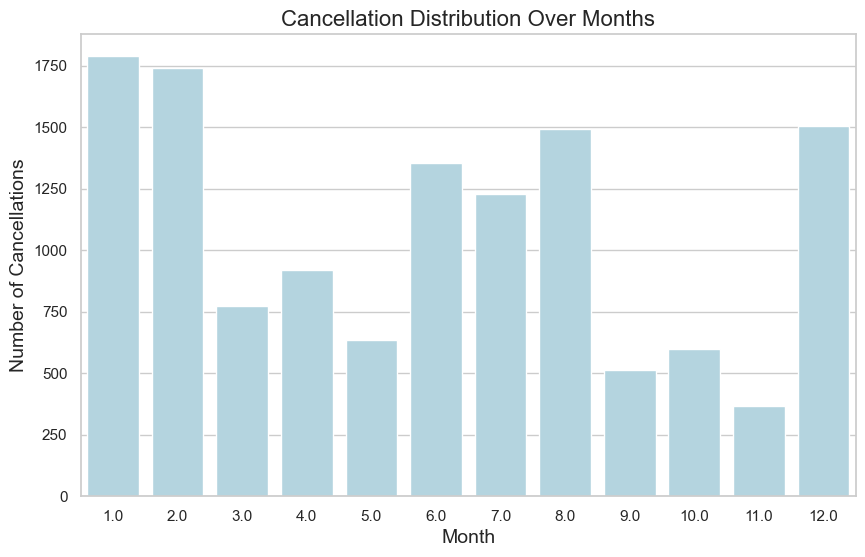

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Convert 'Cancelled' to categorical type for proper counting
df['Cancelled'] = df['Cancelled'].astype(int)

# Group by 'Month' and count the number of cancellations
monthly_cancellations = df.groupby('Month')['Cancelled'].sum()

# Print the cancellation counts for each month
print(monthly_cancellations)

# Visualize the cancellation distribution over months
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_cancellations.index, y=monthly_cancellations.values, color='lightblue')
plt.title('Cancellation Distribution Over Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Cancellations', fontsize=14)
plt.show()


Day_Of_Week
1.0    1999
2.0    1456
3.0    1761
4.0    2113
5.0    1926
6.0    1601
7.0    2063
Name: Cancelled, dtype: int64


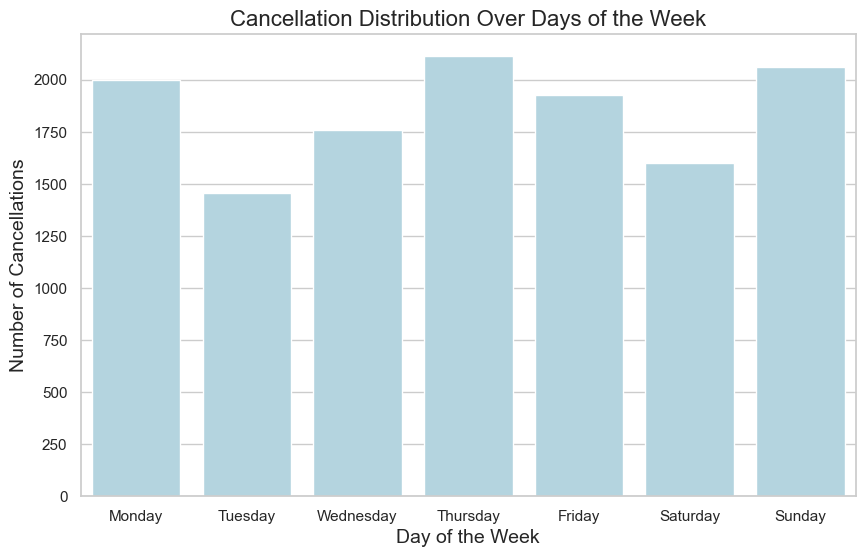

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Convert 'Cancelled' to categorical type for proper counting
df['Cancelled'] = df['Cancelled'].astype(int)

# Group by 'Day_Of_Week' and count the number of cancellations
weekly_cancellations = df.groupby('Day_Of_Week')['Cancelled'].sum()

# Print the cancellation counts for each day of the week
print(weekly_cancellations)

# Visualize the cancellation distribution over days of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_cancellations.index, y=weekly_cancellations.values, color='lightblue')
plt.title('Cancellation Distribution Over Days of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Cancellations', fontsize=14)
plt.xticks(ticks=weekly_cancellations.index - 1, labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


Year
2021.0    3722
2022.0    6420
2023.0    2777
Name: Cancelled, dtype: int64


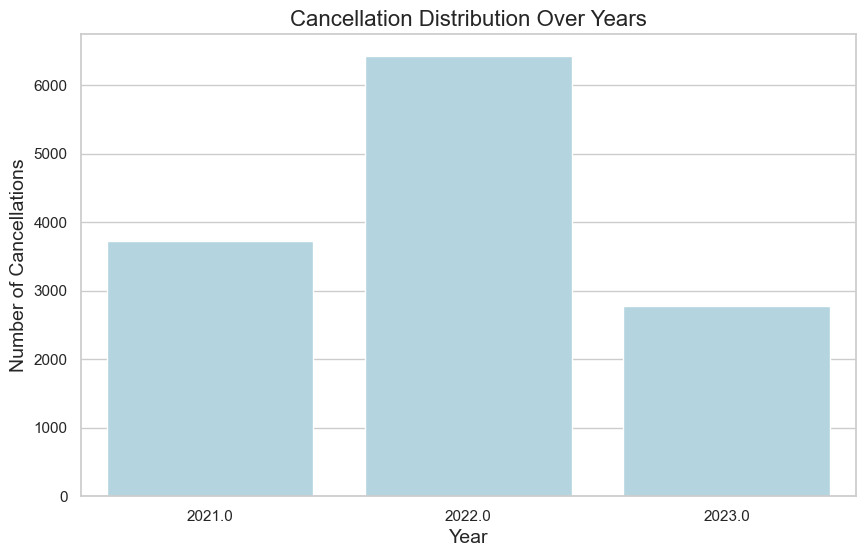

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Convert 'Cancelled' to categorical type for proper counting
df['Cancelled'] = df['Cancelled'].astype(int)

# Group by 'Year' and count the number of cancellations
yearly_cancellations = df.groupby('Year')['Cancelled'].sum()

# Print the cancellation counts for each year
print(yearly_cancellations)

# Visualize the cancellation distribution over years
plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_cancellations.index, y=yearly_cancellations.values, color='lightblue')
plt.title('Cancellation Distribution Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Cancellations', fontsize=14)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'Cancelled' column is binary (0/1)
df['Cancelled'] = df['Cancelled'].astype(int)

# Define the features (independent variables) - excluding categorical columns
features = ['Arrival_Delayed_Due_To_Carrier', 'Arrival_Delayed_Due_To_Weather',
            'Arrival_Delayed_Due_To_Nas', 'Arrival_Delayed_Due_To_Security',
            'Arrival_Delayed_Due_To_Late_Aircraft', 'Diverted',
            'Cancelled_Due_To_Carrier', 'Cancelled_Due_To_National Air System',
            'Cancelled_Due_To_Security', 'Cancelled_Due_To_Weather']

# Define the target variable (Cancelled)
target = df['Cancelled']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df[features], target, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lin_reg_model = LinearRegression()

# Fit the model to the training data
lin_reg_model.fit(X_train, y_train)

# Predict using the test set
y_pred = lin_reg_model.predict(X_test)

# Create a DataFrame to see the coefficients
coefficients = pd.DataFrame(lin_reg_model.coef_, index=features, columns=['Coefficient'])

# Print the coefficients to evaluate feature importance
print("Feature Coefficients:")
print(coefficients)

# Evaluate the model performance (R^2 score)
r_squared = lin_reg_model.score(X_test, y_test)
print(f"R-squared: {r_squared:.4f}")

# Perform statistical analysis using statsmodels to get p-values and more detailed statistics
X_train_sm = sm.add_constant(X_train)  # Add constant term for the intercept
ols_model = sm.OLS(y_train, X_train_sm)
ols_results = ols_model.fit()

# Print summary of the OLS results
print(ols_results.summary())



Feature Coefficients:
                                       Coefficient
Arrival_Delayed_Due_To_Carrier        2.296145e-16
Arrival_Delayed_Due_To_Weather        6.869505e-16
Arrival_Delayed_Due_To_Nas            6.591949e-17
Arrival_Delayed_Due_To_Security      -8.875686e-16
Arrival_Delayed_Due_To_Late_Aircraft -1.318390e-16
Diverted                             -5.502326e-16
Cancelled_Due_To_Carrier              1.000000e+00
Cancelled_Due_To_National Air System  1.000000e+00
Cancelled_Due_To_Security             1.000000e+00
Cancelled_Due_To_Weather              1.000000e+00
R-squared: 1.0000
                            OLS Regression Results                            
Dep. Variable:              Cancelled   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.653e+34
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time

Accuracy: 0.9774
Confusion Matrix:
[[120520    234]
 [  2553     19]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    120754
         1.0       0.08      0.01      0.01      2572

    accuracy                           0.98    123326
   macro avg       0.53      0.50      0.50    123326
weighted avg       0.96      0.98      0.97    123326



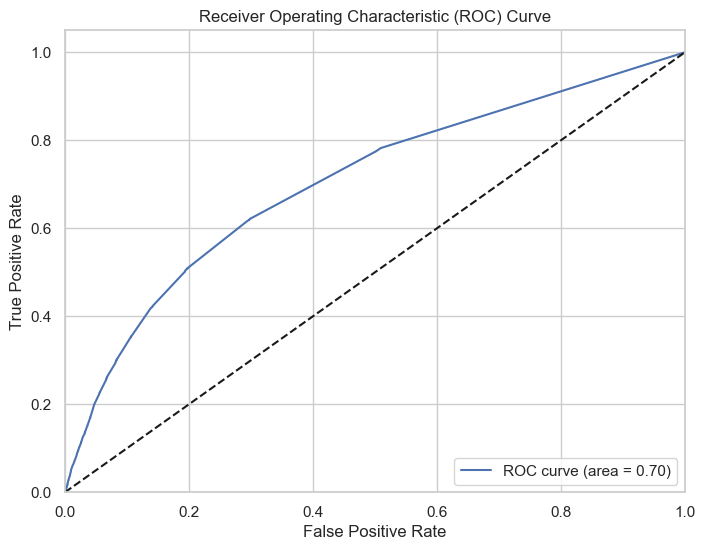

ROC AUC Score: 0.7034


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Select relevant features and target variable
features = ['Year', 'Month', 'Day_Of_Week', 'Airline', 'Origin', 'Destination',
            'CRS_Departure_Time', 'CRS_Arrival_Time']

# Use features, excluding 'Destination_City', and use 'Cancelled' as the target
X = df[features]
y = df['Cancelled']

# Step 2: Handle categorical variables by encoding them
X = pd.get_dummies(X, drop_first=True)

# Step 3: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize the Random Forest model
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Step 5: Train the model
model.fit(X_train, y_train)

# Step 6: Predict on the test set
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report for precision, recall, f1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print the ROC AUC score
print(f"ROC AUC Score: {roc_auc:.4f}")


In [ ]:
# Print the feature importances (equivalent to coefficients in Random Forest)
feature_importance = model.feature_importances_

# Get the feature names
feature_names = X.columns

# Create a DataFrame for better readability
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

# Print the model predictions for the test set
y_pred = model.predict(X_test)
print("\nPredictions on the test set:")
print(y_pred[:20])  # Display the first 20 predictions for brevity

Feature Importances:
                Feature    Importance
1                 Month  1.224264e-01
4      CRS_Arrival_Time  1.218877e-01
3    CRS_Departure_Time  1.205264e-01
2           Day_Of_Week  7.924487e-02
0                  Year  4.179286e-02
..                  ...           ...
359          Origin_STC  3.529158e-07
269          Origin_OGD  2.868170e-07
559     Destination_HVN  2.344669e-07
150          Origin_FLO  1.911981e-07
61           Origin_BKG  1.410430e-07

[766 rows x 2 columns]

Predictions on the test set:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
pip install dash jupyter-dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.3 MB/s eta 0:00:00


In [ ]:
# Import required libraries
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Assume df is the original DataFrame before one-hot encoding
# X is the one-hot encoded dataframe after processing
# Load your trained RandomForestClassifier model as 'model'

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Flight Cancellation Prediction Dashboard", style={'font-family': 'Calibri', 'font-size': '24px'}),

    # Input fields for the flight details with dropdowns and styling
    html.Div([
        html.Label("Year:", style={'font-family': 'Calibri', 'font-size': '14px'}),
        dcc.Dropdown(id="year", options=[
            {'label': str(year), 'value': year} for year in range(2021, 2031)
        ], value=2021, style={'font-family': 'Calibri', 'font-size': '14px'}),

        html.Label("Month:", style={'font-family': 'Calibri', 'font-size': '14px'}),
        dcc.Dropdown(id="month", options=[
            {'label': 'January', 'value': 1},
            {'label': 'February', 'value': 2},
            {'label': 'March', 'value': 3},
            {'label': 'April', 'value': 4},
            {'label': 'May', 'value': 5},
            {'label': 'June', 'value': 6},
            {'label': 'July', 'value': 7},
            {'label': 'August', 'value': 8},
            {'label': 'September', 'value': 9},
            {'label': 'October', 'value': 10},
            {'label': 'November', 'value': 11},
            {'label': 'December', 'value': 12}
        ], value=6, style={'font-family': 'Calibri', 'font-size': '14px'}),

        html.Label("Date of the Month:", style={'font-family': 'Calibri', 'font-size': '14px'}),
        dcc.Dropdown(id="date_of_month", options=[
            {'label': str(day), 'value': day} for day in range(1, 32)
        ], value=1, style={'font-family': 'Calibri', 'font-size': '14px'}),

        html.Label("Airline:", style={'font-family': 'Calibri', 'font-size': '14px'}),
        dcc.Dropdown(id='airline', options=[
            {'label': airline, 'value': airline} for airline in df['Airline'].unique()
        ], value=df['Airline'].unique()[0], style={'font-family': 'Calibri', 'font-size': '14px'}),

        html.Label("Origin:", style={'font-family': 'Calibri', 'font-size': '14px'}),
        dcc.Dropdown(id='origin', options=[
            {'label': origin, 'value': origin} for origin in df['Origin'].unique()
        ], value=df['Origin'].unique()[0], style={'font-family': 'Calibri', 'font-size': '14px'}),

        html.Label("Destination:", style={'font-family': 'Calibri', 'font-size': '14px'}),
        dcc.Dropdown(id='destination', options=[
            {'label': dest, 'value': dest} for dest in df['Destination'].unique()
        ], value=df['Destination'].unique()[0], style={'font-family': 'Calibri', 'font-size': '14px'})

    ], style={'margin': '10px', 'display': 'inline-block', 'verticalAlign': 'top'}),

    # Button to trigger the prediction
    html.Button("Predict Cancellation", id="predict-button", n_clicks=0, style={'font-family': 'Calibri', 'font-size': '14px'}),

    # Reset Button
    html.Button("Reset", id="reset-button", n_clicks=0, style={'font-family': 'Calibri', 'font-size': '14px', 'margin-left': '10px'}),

    # Output for the prediction result
    html.Div(id='prediction-output', style={'marginTop': '20px', 'font-family': 'Calibri', 'font-size': '20px', 'font-weight': 'bold'})
], style={'max-width': '1200px', 'margin': '0 auto'})  # Style to keep the dashboard big enough

# Callback for prediction and reset functionality
@app.callback(
    [Output('year', 'value'),
     Output('month', 'value'),
     Output('date_of_month', 'value'),
     Output('airline', 'value'),
     Output('origin', 'value'),
     Output('destination', 'value'),
     Output('prediction-output', 'children')],
    [Input('predict-button', 'n_clicks'),
     Input('reset-button', 'n_clicks')],
    [State('year', 'value'),
     State('month', 'value'),
     State('date_of_month', 'value'),
     State('airline', 'value'),
     State('origin', 'value'),
     State('destination', 'value')]
)
def make_prediction_or_reset(predict_clicks, reset_clicks, year, month, date_of_month, airline, origin, destination):
    ctx = dash.callback_context  # Get the context to identify which button was clicked

    if not ctx.triggered:
        return year, month, date_of_month, airline, origin, destination, ""

    button_id = ctx.triggered[0]['prop_id'].split('.')[0]

    if button_id == 'reset-button':  # If reset button was clicked
        return 2021, 6, 1, df['Airline'].unique()[0], df['Origin'].unique()[0], df['Destination'].unique()[0], ""

    # Prepare the input features based on the user input
    input_data = pd.DataFrame({
        'Year': [year],
        'Month': [month],
        'Day': [date_of_month],  # Day of the month
        'Airline': [airline],
        'Origin': [origin],
        'Destination': [destination]
    })

    # One-hot encode categorical variables (ensure this matches how X was created)
    input_data = pd.get_dummies(input_data, drop_first=True).reindex(columns=X.columns, fill_value=0)

    # Make the prediction using the Random Forest model
    prediction = model.predict(input_data)
    prediction_text = "Canceled" if prediction[0] == 1 else "Not Canceled"

    return year, month, date_of_month, airline, origin, destination, f"The flight is predicted to be: {prediction_text}"

# Running the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)
